# PHY204 – The 2D waveguide

-----

## Theoretical background

For an inhomogeneous dielectric medium with index of refraction $n(\textbf{r})=c\sqrt{\mu_0\epsilon(\textbf{r})}$,  wave propagation obeys the following inhomogeneous differential equation,
$$\tag{1}
    \nabla^2\textbf{E}-\frac{n^2(\textbf{r})}{c^2}\partial^2_t{\textbf{E}} = -\nabla\left(\textbf{E}\cdot\frac{\nabla\epsilon}{\epsilon}\right).
$$
For time-harmonic fields that vary as $\exp\{-i\omega t\}$ the equation reduces to an inhomogeneous Helmholtz equation:
$$\tag{2}
    \left[\nabla^2+n^2(\textbf{r})\frac{\omega^2}{c^2}\right]\textbf{E} =  -\nabla\left(\textbf{E}\cdot\frac{\nabla\epsilon}{\epsilon}\right).
$$
The RHS plays no explicit role if the variation of $\epsilon(\textbf{r})$ is sufficiently weak. Also, the $\nabla\epsilon$ term is usually not needed, as it is sufficient to impose the dielectric matching conditions at the surfaces where $n(\textbf{r})$ is discontinuous. Thus, we can write:
$$\tag{3}
    \left[\nabla^2+n^2(\textbf{r})\frac{\omega^2}{c^2}\right]\textbf{E} =  \textbf{0}.
$$
To find the guided modes of a dielectric waveguide, we have to solve equation (3). We work in cartesian coordinates. We focus on TE modes and assume the electric field of the form:
$$\tag{4}
\textbf{E}(x, y, z, t) = \hat{\textbf{y}}E(x,y)\exp[i(hz-\omega t)].
$$

(We could also make the choice $\textbf{E}(x, y, z, t) = \hat{\textbf{u}}E(x,y)\exp[i(hz-\omega t)]$, where $ \hat{\textbf{u}}=\alpha  \hat{\textbf{x}}+\beta  \hat{\textbf{y}}$, but this is equivalent to solving the same equation, with a factor of $\alpha$ or $\beta$ introduced before the linear term.)

Substituting (4) into (3) gives:
$$\tag{5}
    \left[\partial^2_x+\partial^2_y+\left(n^2\frac{\omega^2}{c^2}-h^2\right)\right]E(x,y)=0.
$$
The symmetry of the guide and equation (5) with respect to the inversion $\mathbf{r}\mapsto-\mathbf{r}$ leads us to expect even solutions (*i.e.*, $E(\mathbf{r})=E(-\mathbf{r})$) and odd solutions (*i.e.*, $E(\mathbf{r})=-E(-\mathbf{r})$).

----

## Numerical approach

We therefore have to solve the following linear, homogeneous, second-order partial differential equation:
$$\left(\frac{\partial^2 E}{\partial x^2}+\frac{\partial^2 E}{\partial y^2}\right)+\frac{n^2(x,y)\omega^2}{c^2}E = h^2 E.$$


### Dimensionless equation

Introduce the dimensionless positions $X$ and $Y$ defined by
$$X = \dfrac{x\omega}{c}=\dfrac{x}{\ell_0}\qquad{}Y = \dfrac{y\omega}{c}=\dfrac{y}{\ell_0}.$$
The PDE becomes:
$$\tag{6}
\left(\frac{\partial^2 E}{\partial X^2}+\frac{\partial^2 E}{\partial Y^2}\right)+n^2(X,Y)E = K^2 E,
$$
where $K=\dfrac{h}{\kappa_0}= \dfrac{hc}{\omega}$.

----

### Discretization technique

To obtain the guided modes and their corresponding eigenvalues, we turn equation (6) into an eigenvalue problem, by discretizing the spatial variables $X$ and $Y$. We slice the domain of the fiber $\left[0, \dfrac{b\omega }{c}\right] \times \left[0, \dfrac{b\omega }{c}\right]$ at evenly spaced points on a mesh of size $N\times N$. The discretized position along the waveguide's cross-section is now characterized by the family of points $\{(X_i, Y_j)\}_{1\leqslant i, j\leqslant N}$, where

$$X_i = Y_i = \dfrac{i-1}{N-1}\dfrac{b\omega}{c},$$

or simply by the corresponding indices $\{(i, j)\}_{1\leqslant i, j\leqslant N}$ using the above relation. To each point $(i, j)$, we associate a value $E_{i,j}\equiv E(X_i, Y_j)$. The attached diagram illustrates this process, showing the cross-section of an optical fiber and the mesh of points used for spatial discretization.

*We assume the cladding size is large compared to the core size, which allows us to approximate $E(x, y) = 0$ at the boundaries of the cladding, as well as on the outer boundaries of our square mesh (in the cladding, we expect an exponential decay).*

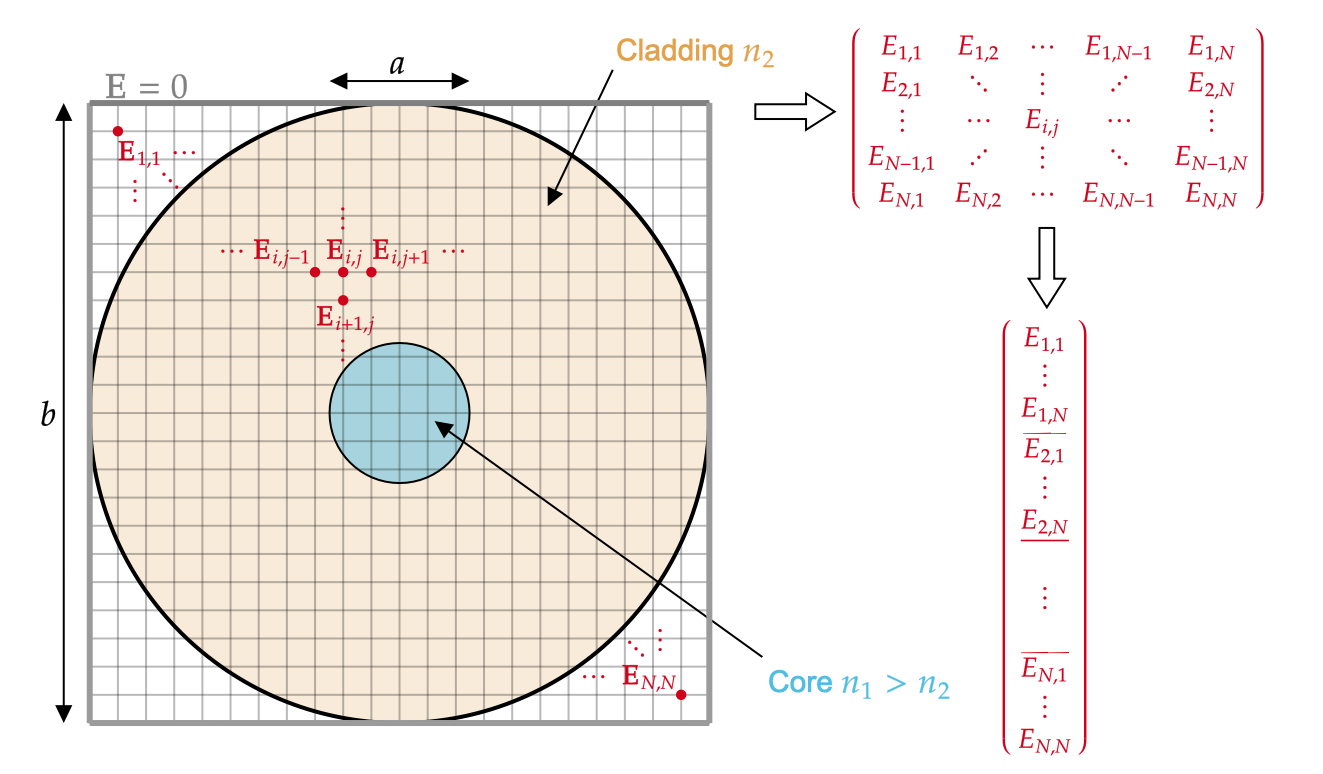

Let $\mathbf{A}=\begin{pmatrix}
E_{1,1}\\
\vdots \\
E_{1,N}\\
\overline{E_{2,1}}\\
\vdots \\
\underline{E_{2,N}}\\
\vdots \\
\overline{E_{N,1}}\\
\vdots \\
E_{N,N}
\end{pmatrix}\in \mathbb{R}^{N^2}$. We undergo the process of *discretizing the operators*, that is, turning the partial derivatives and the index of refraction that appear in equation (6) into matrices of size $N^2\times N^2$ that act on this newly-defined vector $\mathbf{A}$.

 - **The transverse Laplacian $\Delta_{\perp} = \partial^2_X+\partial^2_Y$:** we have to discretize the derivatives with respect to $X$ and $Y$. The first derivatives read
 $$(\partial_X E)_{i,j} \approx \dfrac{E_{i,j+1}-E_{i,j}}{\Delta X}\qquad{}(\partial_Y E)_{i,j}\approx \dfrac{E_{i-1,j}-E_{i,j}}{\Delta Y}\qquad{}\text{where}\qquad{}\Delta X = \Delta Y = \dfrac{b\omega}{(N-1)c}.$$
 
 The second derivatives are therefore
  $$(\partial^2_X E)_{i,j} \approx \dfrac{E_{i,j+1}+E_{i,j-1}-2E_{i,j}}{(\Delta X)^2}\qquad{}(\partial^2_Y E)_{i,j}\approx \dfrac{E_{i+1,j}+E_{i-1,j}-2E_{i,j}}{(\Delta Y)^2}.$$
  
  The transverse Laplacian can be represented by the matrix $T\in\mathcal{M}_{N^2}(\mathbb{R})$,
  
  $$\Delta_{\perp}=\color{blue}{\partial^2_X} +\color{green}{\partial^2_Y} \longrightarrow \begin{pmatrix}
(\color{blue}{\partial^2_X} E+\color{green}{\partial^2_Y} E)_{1,1}\\
\vdots \\
(\color{blue}{\partial^2_X} E+\color{green}{\partial^2_Y} E)_{1,N}\\
\overline{(\color{blue}{\partial^2_X} E+\color{green}{\partial^2_Y} E)_{2,1}}\\
\vdots \\
\underline{(\color{blue}{\partial^2_X} E+\color{green}{\partial^2_Y} E)_{2,N}}\\
\vdots \\
\overline{(\color{blue}{\partial^2_X} E+\color{green}{\partial^2_Y} E)_{N,1}}\\
\vdots \\
(\color{blue}{\partial^2_X} E+\color{green}{\partial^2_Y} E)_{N,N}
\end{pmatrix}
=
\dfrac{1}{(\Delta X)^2}
\begin{pmatrix}
\color{red}{-4} & \color{blue}{1} &  \cdots & \cdots & \color{green}{1} &   &   &  \\
\color{blue}{1} & \color{red}{-4} & \color{blue}{1} & \cdots & \cdots  & \color{green}{1} &   &  \\
\vdots  & \color{blue}{1} & \color{red}{-4} & \color{blue}{1} &  \cdots & \cdots  & \color{green}{1} & \\
\vdots & \vdots & \color{blue}{1} & \ddots & \ddots & && \ddots \\
\color{green}{1} & \vdots   & \vdots  & \ddots &  \ddots & \ddots  &  &   & \color{green}{1}  & \\
  & \color{green}{1} & \vdots  & &  \ddots &  \ddots & \ddots &   & \vdots  & \color{green}{1}\\
  &   & \color{green}{1} &  &   & \ddots  & \ddots &  \ddots &  \vdots & \vdots\\
 &   &   & \ddots  &   &   &\ddots & \color{red}{-4} & \color{blue}{1} & \vdots \\
  &  &   &   & \color{green}{1}  &   \cdots&\cdots &  \color{blue}{1} & \color{red}{-4} & \color{blue}{1} \\
  &   &  &   &   & \color{green}{1}  & \cdots&  \cdots & \color{blue}{1} & \color{red}{-4} \\
\end{pmatrix} \begin{pmatrix}
E_{1,1}\\
\vdots \\
E_{1,N}\\
\overline{E_{2,1}}\\
\vdots \\
\underline{E_{2,N}}\\
\vdots \\
\overline{E_{N,1}}\\
\vdots \\
E_{N,N}
\end{pmatrix}
\equiv T \mathbf{A}.$$
  
  _One can verify this by direct calculation. The secondary diagonals of $\color{blue}{1}$ entries account for the second partial derivative along $X$ and have occasional gaps whenever $E_{i,j+1}$ or  $E_{i,j-1}$ are undefined (*i.e.*, whenever $j=1$ or $j=N$). The secondary diagonals of $\color{green}{1}$ entries account for the second partial derivative along $Y$; each $\color{green}{1}$ is a distance of $N$ away vertically from the $\color{red}{-4}$ entries, since to move to the next row in the matrix of $E$, one needs to skip over $N$ elements of the vector $\mathbf{A}$._
  
  This matrix can be written in a more compact form in terms of the one-dimensional second-derivative operator,
  $$D=
\begin{pmatrix}
-2 & 1  &     \\
 1 & -2 & 1   \\
   &  1 & \ddots & \ddots   \\
   &    & \ddots & \ddots & 1 \\
   &    &       & 1 & -2 
\end{pmatrix}\in \mathcal{M}_{N}(\mathbb{R}).$$
  One can verify by direct calculation that $(\Delta X)^2 T = D\otimes I_N+I_N\otimes D=D\oplus D$ (see the Appendix for the definitions of $\oplus$ and $\otimes$).
  
  
 - **The refractive index term $n^2(X, Y)\times \mathbb{1}$:** the term $n^2(X,Y)E$ translates to a multiplication of each of the entries of $\mathbf{A}$ by the corresponding $n_{i,j}^2$. In matrix language, the refractive index term is represented by the diagonal matrix $U\in\mathcal{M}_{N^2}(\mathbb{R})$,

  $$n^2(X, Y) \longrightarrow \begin{pmatrix}
n_{1,1}^2 E_{1,1}\\
\vdots \\
n_{1,N}^2 E_{1,N}\\
\overline{n_{2,1}^2 E_{2,1}}\\
\vdots \\
\underline{n_{2,N}^2 E_{2,N}}\\
\vdots \\
\overline{n_{N,1}^2 E_{N,1}}\\
\vdots \\
n_{N,N}^2 E_{N,N}
\end{pmatrix}
=
\begin{pmatrix}
n_{1,1}^2 &   &    &   &   &   &   &  \\
  & \ddots &   &   &    &   &   &  \\
   &   & n_{1,N}^2 &   &    &    &   & \\
  &   &   & n_{2,1}^2 & & &&  \\
  &     &    &  &  \ddots &   &  &   &    & \\
  &   &    & &   &  n_{2,N}^2 &  &   &    &  \\
  &   &   &  &   &   & \ddots &  &    &  &  \\
 &   &   &   &   &   & & n_{N,1}^2 &   &   &  \\
  &  &   &   &    &    &  &    & \ddots &   &  \\
  &   &  &   &   &    &  &    &   & n_{N,N}^2 &   \\
\end{pmatrix} \begin{pmatrix}
E_{1,1}\\
\vdots \\
E_{1,N}\\
\overline{E_{2,1}}\\
\vdots \\
\underline{E_{2,N}}\\
\vdots \\
\overline{E_{N,1}}\\
\vdots \\
E_{N,N}
\end{pmatrix}
\equiv U\mathbf{A}.$$

----

### The eigenvalue problem

With the newly-defined operators, we can turn the differential equation (6) into an eigenvalue problem:
$$\boxed{\left[\dfrac{1}{\Delta X^2}(D\oplus D) + n^2(X,Y)\right]\mathbf{A} = K^2\mathbf{A}},\tag{7}$$
where $\mathbf{A}$ is the vector that describes the electric field amplitude (defined in the previous subsection). Assuming that the eigenvalues returned by the program are $\alpha_n = K_n^2$, then we can recover the $h$ eigenvalues:
$$K=\dfrac{h}{\kappa_0}= \dfrac{hc}{\omega}\implies \boxed{h_n = \kappa_0K_n =\dfrac{\sqrt{\alpha_n} \omega}{c}}.$$

In practice, we first compute the auxiliary (sparse) matrices $T=\dfrac{1}{\Delta X^2}(D\oplus D)$ and $U=n^2$, and define $H = T+U$, such that $H\mathbf{A} = K^2\mathbf{A}$.

Note that we handle sparse matrices using the specialized package `scipy.sparse`. Since the matrices are of size $N^2$, this step is essential to make sure the program runs in a reasonable amount of time.

## Implementation 

In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from scipy import sparse

c = 299792458

The solver is wrapped in a class called `Helmholtz_2D`, whose constructor requires the following arguments:
 - `refr_index`: the function defining the refractive index pattern. It is a function of two dimensionless variable $\chi, \xi$, which take values between $-1$ and $+1$ - they represent the position along the waveguide, with $-1$ meaning left / bottom and $+1$ meaning right / top respectively.
 - `clad_size`: the cladding size, expressed in meters (for our examples, typically around `125e-6 m`).
 - `N`: number of points in the mesh used for the discretization. Defaults to `100`.
 - `omega`: the frequency of the light that propagates in the waveguide (in `rad/s`). Defaults to `1e14 rad/s`.

----

The available methods are:
 - `plot_refr_index(self)`: shows a 2D color plot of the index of refraction specified by the function `refr_index`.
 - `compute_operators(self)`: method performed on initialization that computes the discretized operators $T$, $U$ and $H$ mentioned above.
 - `find_modes(self, number: int, tol: float = 0.001)`: finds the eigenvalues and eigenvectors of the operator $H$, which up to reshaping represent the solutions of our partial differential equation.
     - `number`: the number of eigenvalues and eigenmodes to look for
     - `tol`: numerical tolerance parameter given to the function `scipy.sparse.linalg.eigsh()`.
     
   Returns a tuple containing: (1) the eigenvalues (2) the corresponding eigenvector matrix (3) an array of eigenvectors reshaped into an $N\times N$ matrix.
 - `plot_guided_modes(self, number: int, min_K: float = 1.0, max_K: float = 1.5, tol: float = 0.001, contour_levels: int = 20, save: bool = False)`: plots the eigenmodes corresponding to the $\{h_n\}$ eigenvalues found by `find_modes()`. 
     - `number`: the number of eigenmodes to plot within a specified range for $K$.
     - `min_K`: the minimum value of $K$ to be considered.
     - `max_K`: the maximum value of $K$ to be considered.
     - `tol`: numerical tolerance parameter given to the function `scipy.sparse.linalg.eigsh()`.
     - `contour_levels`: number of contour levels for the 2D color plot.
     
   Returns a list of "valid modes", meaning those that satisfy the following two conditions: (1) the corresponding eigenvalue of $H$ is positive (2) the square root of this eigenvalue, `K`, lies within the speicifed range, *i.e.*, `min_K < K < max_K`. 
 - `plot_mode_in_1D(self, K, eigenmode, vertical=False)`: takes a value of `K` and an eigenmode `eigenmode` as input and plots a slice of the eigenmode along an axis going through the center of the waveguide (either vertically or horizontally)
 - `plot_mode_in_3D(self, K, eigenmode)`: shows a 3D color plot of a given mode `eigenmode` with a given eigenvalue `K`.
 - `__str__(self)`: produces a string containing a summary of the parameters with which a solution was produced.

In [2]:
class Helmholtz_2D:
    def __init__(self, refr_index: callable, clad_size: float, N: int = 100, omega: float = 1e14):
        self.N = N
        self.omega = omega
        self.L = clad_size * 1e6
        self.L0 = c / omega
        self.k0 = omega / c
        self.refr_index = refr_index
        
        self.X, self.Y = np.meshgrid(np.linspace(0, clad_size / self.L0, N, dtype = float),
                                     np.linspace(0, clad_size / self.L0, N, dtype = float))
        self.delta_X = self.X[0][1] - self.X[0][0]
        self.x, self.y = 2 * self.X * self.L0 / clad_size - 1, 2 * self.Y * self.L0 / clad_size - 1
        self.n, self.V = np.meshgrid(np.zeros(N, dtype = float), np.zeros(N, dtype = float))
        for i in range(0, N):
            for j in range(0, N):
                self.n[i][j] = self.refr_index(self.x[i][j] , self.y[i][j])
                self.V[i][j] = self.n[i][j] ** 2
            
        self.D, self.T, self.U, self.H = None, None, None, None
        self.compute_operators()
    
    def plot_refr_index(self):
        cont_n = plt.imshow(self.n[::-1])
        plt.colorbar(cont_n)
        plt.show()
    
    def compute_operators(self):
        self.diag = np.ones([self.N])
        self.diags = np.array([self.diag, -2*self.diag, self.diag])
        self.D = sparse.spdiags(self.diags, np.array([-1, 0, 1]), self.N, self.N) 
        self.T = sparse.kronsum(self.D, self.D) / self.delta_X ** 2
        self.U = sparse.diags(self.V.reshape(self.N**2), (0)) 
        self.H = self.T + self.U

    def find_modes(self, number: int, tol: float = 0.001):
        eigenvalues, eigenvectors = eigsh(self.H, k = number, which = 'LA', tol=tol)
        return eigenvalues, eigenvectors, np.array([v.reshape((self.N, self.N)) for v in eigenvectors.T])
    
    def plot_guided_modes(self, number: int, min_K: float = 1.0, max_K: float = 1.5, tol: float = 0.001, 
                          contour_levels: int = 20):
        eigenvalues, ev_matrix, modes = self.find_modes(number, tol=tol)
        valid_modes = []
        for i in range(number):
            if eigenvalues[i] < 0:
                print(f"Mode {number-i} skipped: negative eigenvalue.")
                continue
            K = np.sqrt(eigenvalues[i])
            if min_K <= K and K <= max_K:
                plt.figure(figsize=(3.0, 3.0))
                maxsign = (-1) ** (np.max(np.abs(modes[i])) != np.max(modes[i]))
                # normalize the mode and append it to the valid modes
                valid_modes.append((K, maxsign * modes[i] / np.max(np.abs(modes[i]))))
                contour = plt.contourf(self.x * self.L * 0.5, self.y * self.L * 0.5,
                                maxsign * modes[i] / np.max(np.abs(modes[i])), contour_levels, cmap='inferno')
                plt.colorbar(contour)
                plt.title(f'$h = {round(K, 3)}\,\\kappa_0$\n')
                plt.xlabel(r'$x$ position [µm]')
                plt.ylabel(r'$y$ position [µm]')
                plt.show()
            else:
                print(f"Mode {number-i} skipped: K outside the range [{min_K}, {max_K}].")
        return valid_modes
    
    def plot_mode_in_1D(self, K, eigenmode, vertical=False):
        # The input of this function should be one of the pairs returned by plot_guided_modes
        plt.figure(figsize=(3.0, 3.0))
        mid_vals = [vect[len(vect) // 2] for vect in (eigenmode if vertical else eigenmode.T)]
        x_vals = np.linspace(-self.L / 2, self.L / 2, self.N)
        plt.plot(x_vals, mid_vals)
        plt.xlabel(f'{"$y$" if vertical else "$x$"} position [µm]')
        plt.ylabel(f'$E({"y" if vertical else "x"})$')
        plt.title(f'Cut along a central axis of the mode $h = {round(K, 3)}\,\\kappa_0$')
        plt.show()
        
    def plot_mode_in_3D(self, K, eigenmode):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        x_vals = np.linspace(-self.L / 2, self.L / 2, self.N)
        y_vals = np.linspace(-self.L / 2, self.L / 2, self.N)
        X, Y = np.meshgrid(x_vals, y_vals)
        surf = ax.plot_surface(X, Y, eigenmode, cmap='viridis', edgecolor='none')
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
        ax.set_title(f"Mode $h = {round(K, 3)}\,\\kappa_0$ plotted in 3D", fontsize=14)
        ax.set_xlabel('$x$ position [µm]', fontsize=12)
        ax.set_ylabel('$y$ position [µm]', fontsize=12)
        ax.set_zlabel(r'Electric field amplitude $E(x,y)$', fontsize=12)
        plt.show()
        
    def __str__(self):
        op_string = ""
        if self.D is not None:
            op_string = f"""- H =
            {self.H.todense()}
            
            - T = 
            {self.T.todense()}
            
            - U = 
            {self.U.todense()}"""
        return f"""Helmholtz_2D object with parameters:
        - mesh size: {self.N}
        - index of refraction: {self.refr_index.__name__}
        - cladding size: {self.L} µm
        - frequency: {self.omega/1e12} * 10^12 rad/s
        {op_string}
        """

## Testing

We now proceed to try our code on some simple examples. We start with a step-index in the form of a square. We then approximate this profile using a supergaussian index and verify that for high enough exponents, the two outputs coincide. We also included several examples with circular symmetry and "multi-core" fibers, to see what the solver produces.

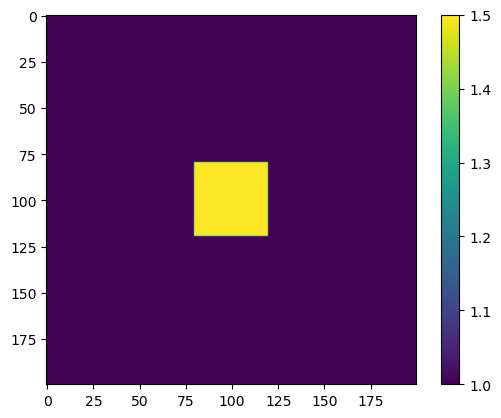

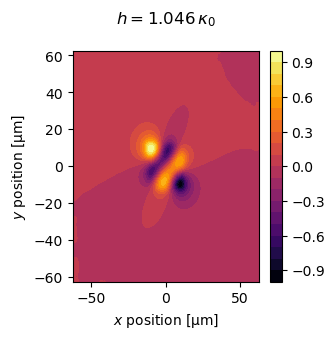

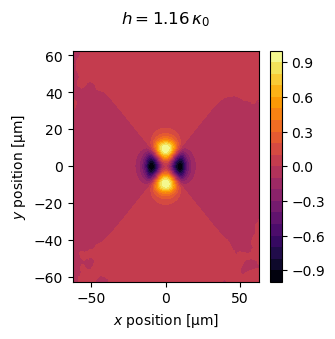

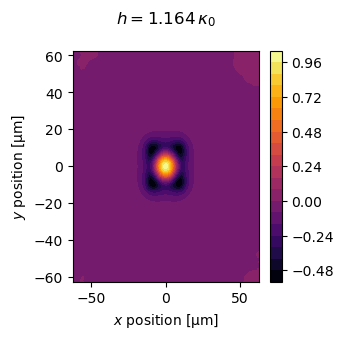

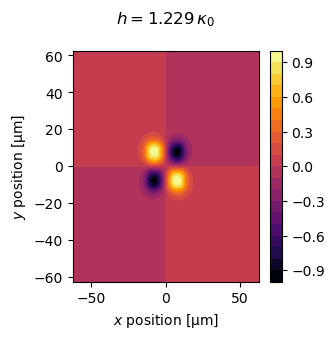

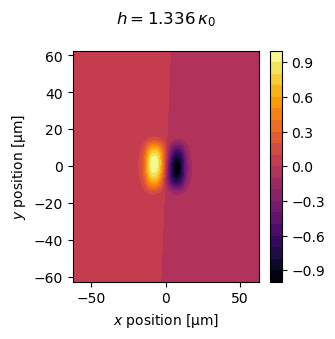

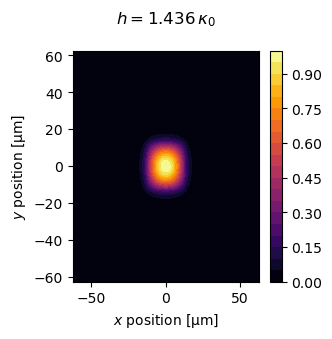

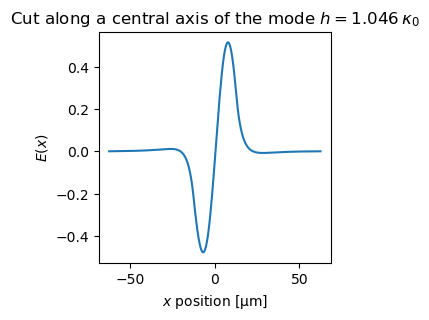

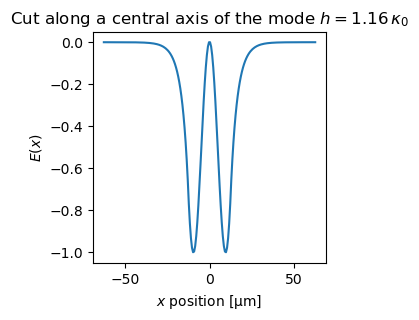

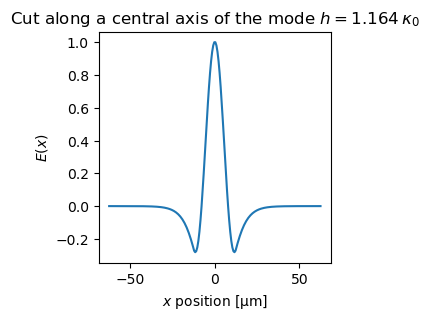

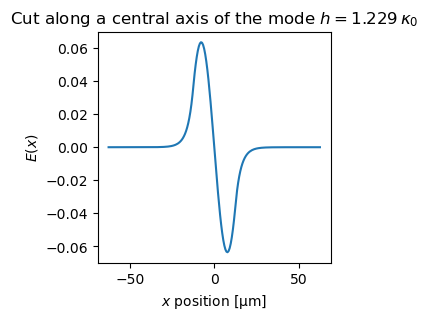

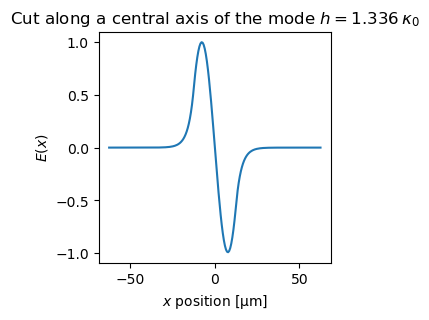

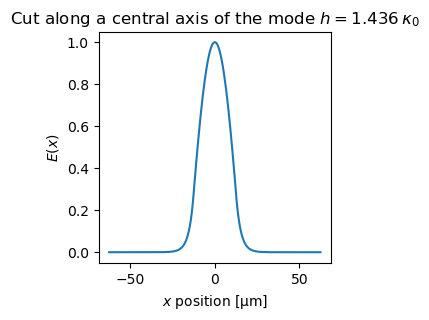

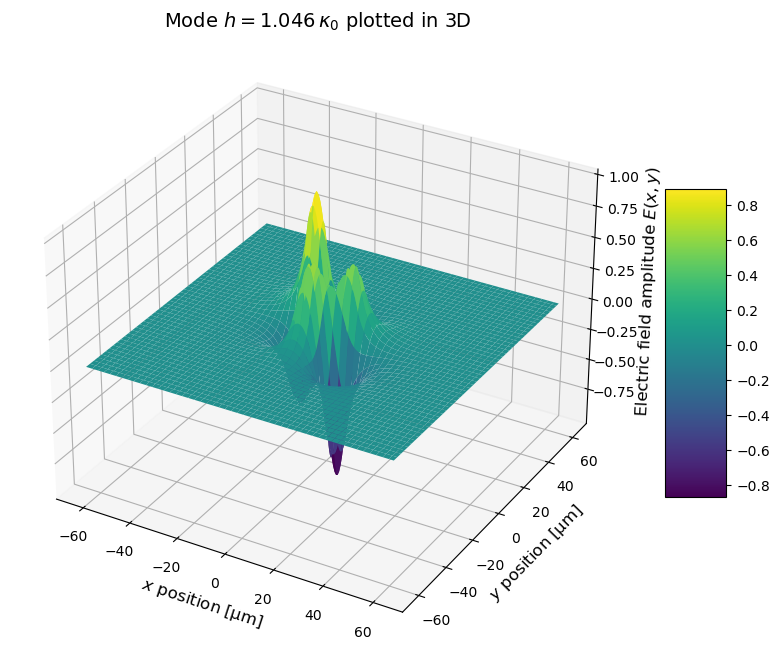

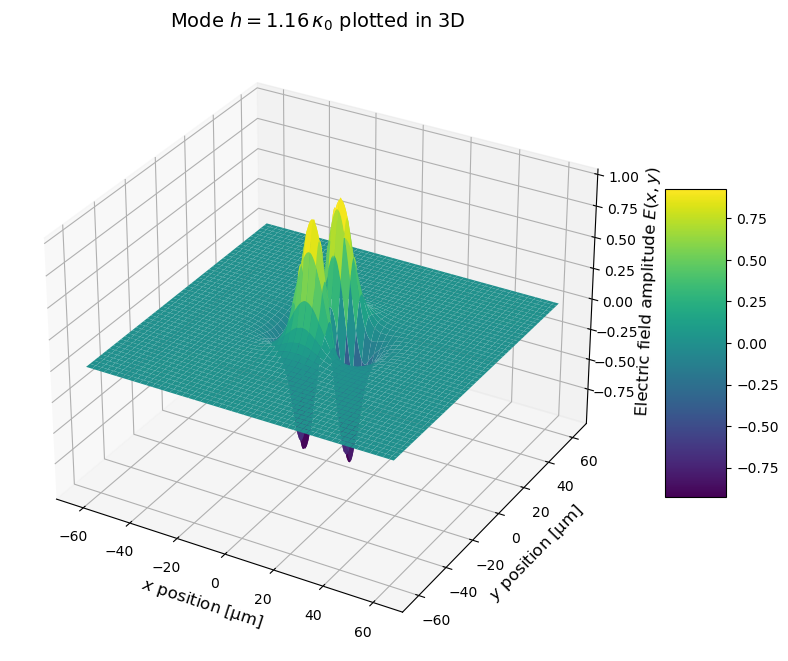

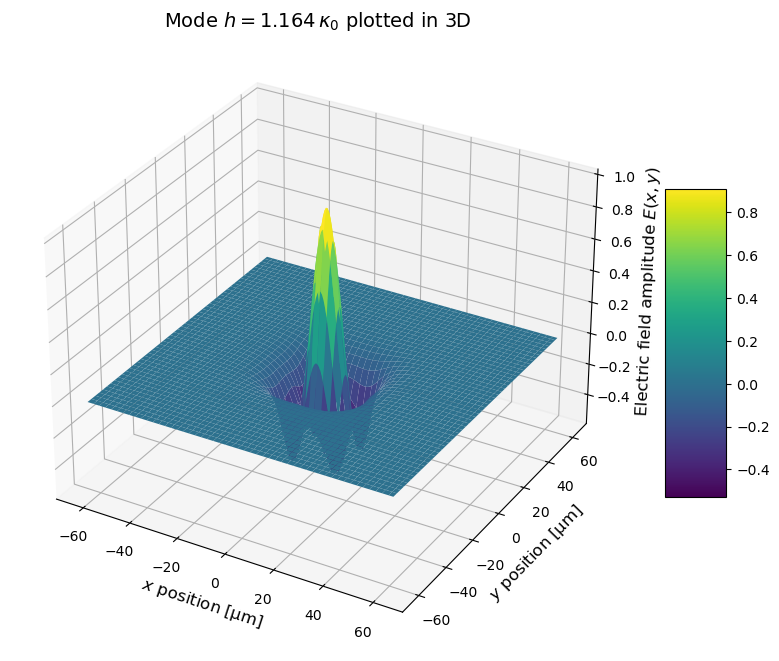

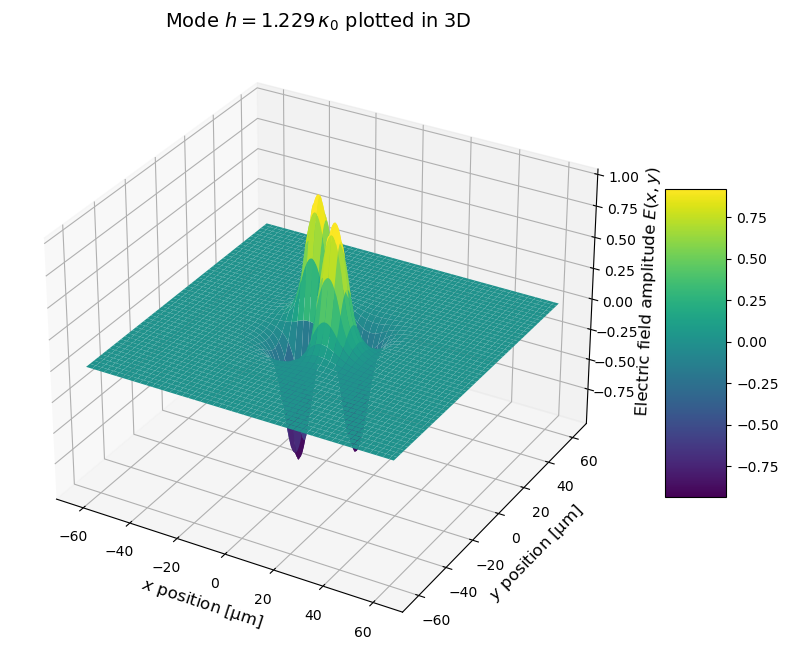

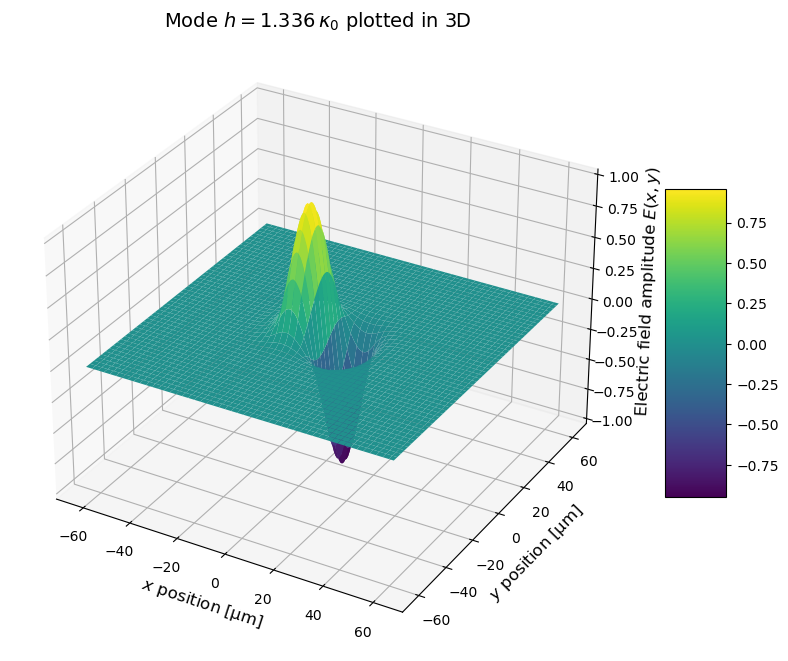

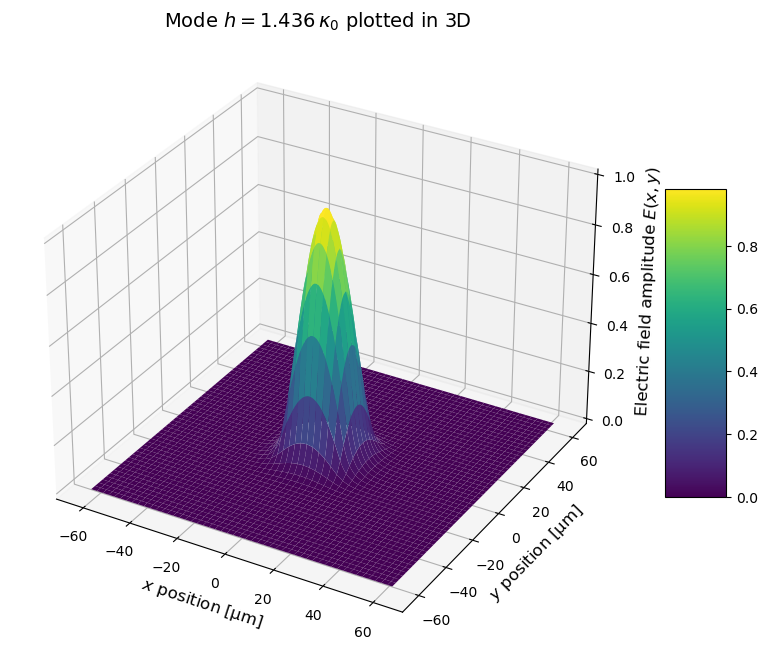

In [3]:
core_fraction = 0.2
def pcws_constant_square(x, y):
    return 1.5 if max(abs(x), abs(y)) < core_fraction else 1.0

%matplotlib inline
solver = Helmholtz_2D(pcws_constant_square, 125e-6, N=200, omega=1e14)
solver.plot_refr_index()
valid_modes = solver.plot_guided_modes(6, min_K=1.0, max_K=1.5, tol=0.001)
for K, v in valid_modes:
    solver.plot_mode_in_1D(K, v)
    
for K, v in valid_modes:
    solver.plot_mode_in_3D(K, v)

# print(solver)  # To see the parameters that were used to find these modes

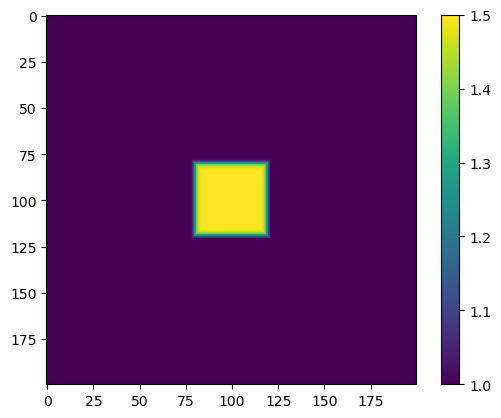

Mode 10 skipped: K outside the range [1.0, 1.5].
Mode 9 skipped: K outside the range [1.0, 1.5].
Mode 8 skipped: K outside the range [1.0, 1.5].


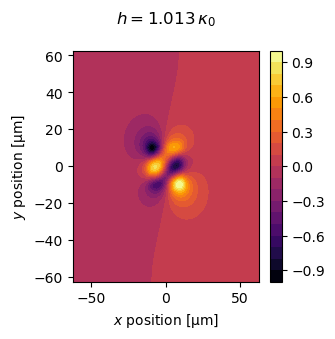

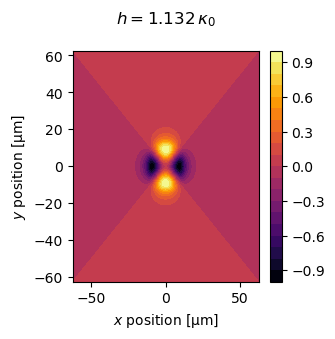

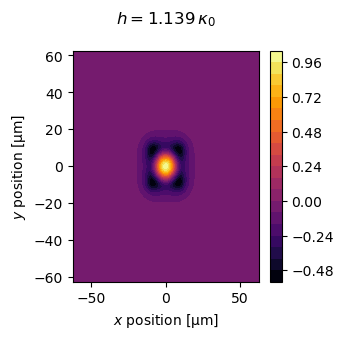

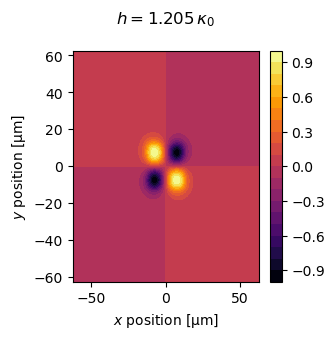

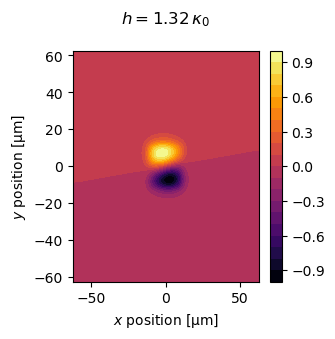

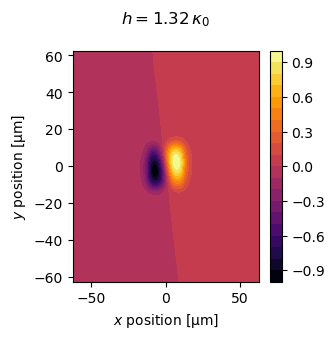

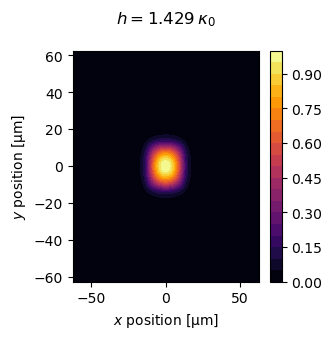

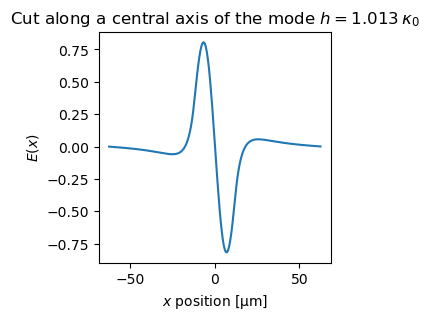

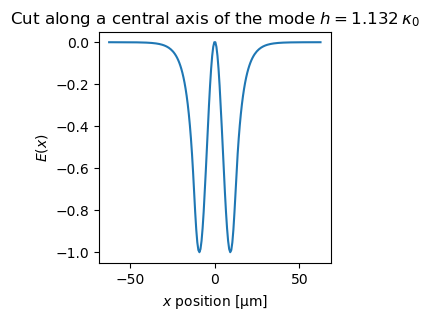

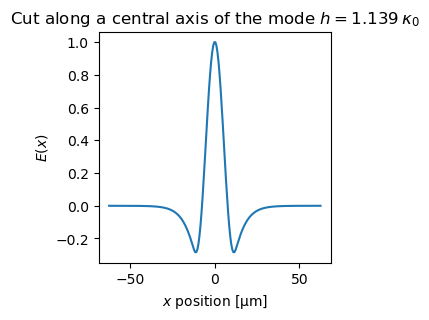

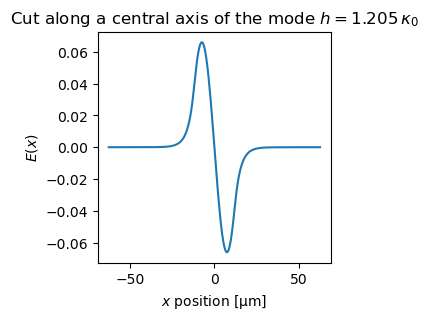

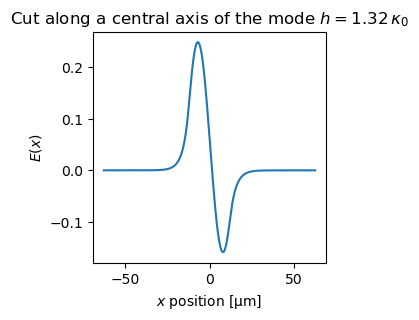

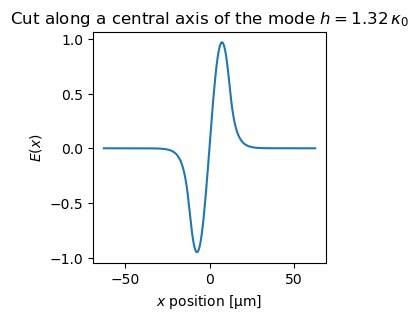

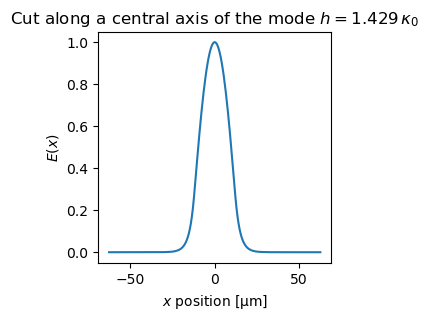

In [4]:
core_fraction = 0.2
n_min = 1.0
n_max = 1.5
def supergaussian(x, y):
    return n_min + (n_max - n_min) *  np.exp(-(max(abs(x), abs(y)) / (core_fraction)) ** 20)

solver = Helmholtz_2D(supergaussian, 125e-6, N=200, omega=1e14)
solver.plot_refr_index()
valid_modes = solver.plot_guided_modes(10, min_K=1.0, max_K=1.5, tol=0.001)
for K, v in valid_modes:
    solver.plot_mode_in_1D(K, v)
    
# Plot in 3D
# for K, v in valid_modes:
#     solver.plot_mode_in_3D(K, v)

# print(solver)  # To see the parameters that were used to find these modes

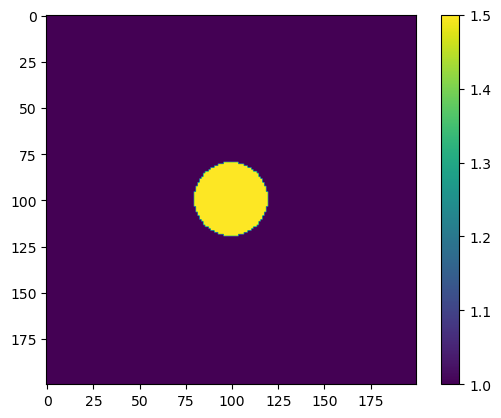

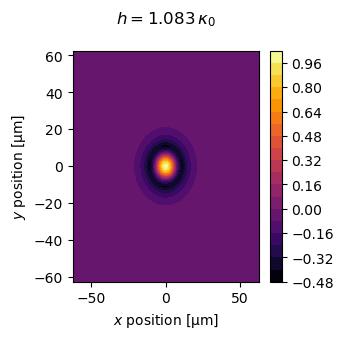

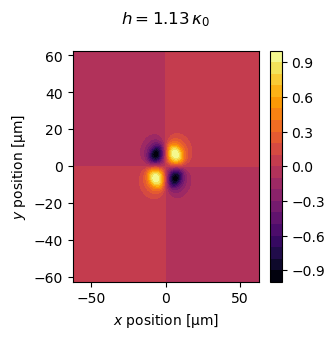

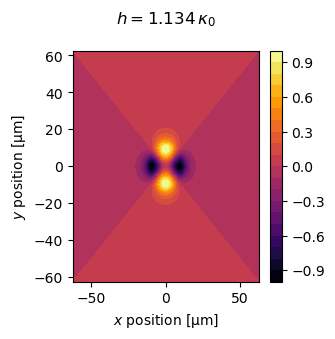

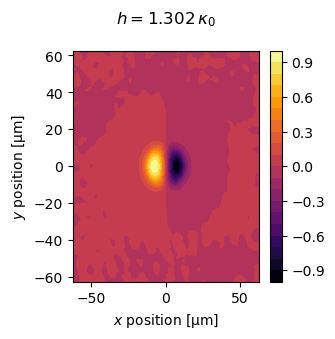

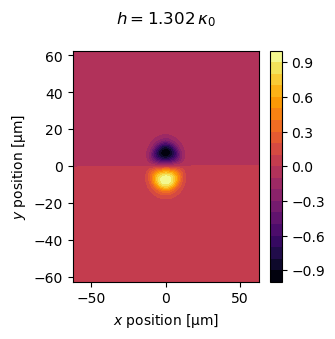

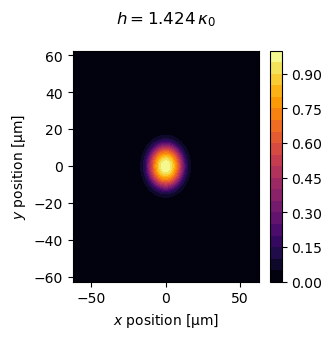

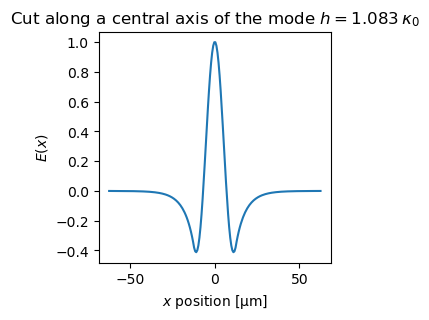

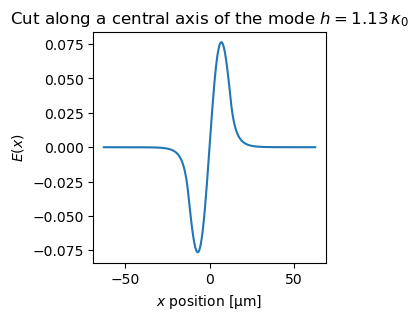

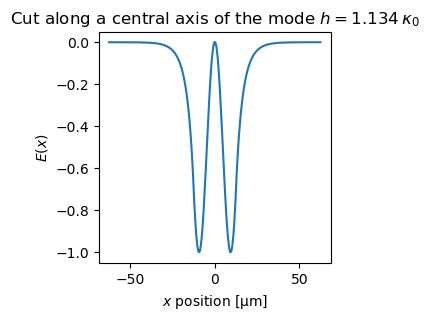

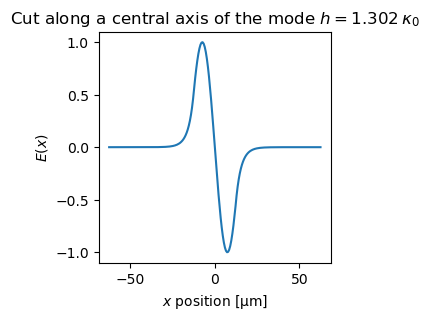

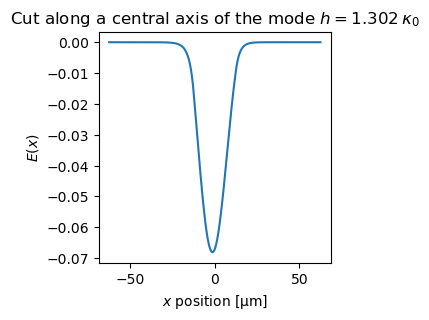

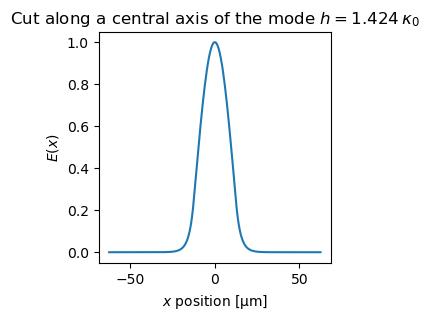

In [5]:
core_fraction = 0.2
def circle(x, y):
    return 1.5 if np.sqrt(x**2 + y**2) < core_fraction else 1.0

%matplotlib inline
solver = Helmholtz_2D(circle, 125e-6, N=200, omega=1e14)
solver.plot_refr_index()
valid_modes = solver.plot_guided_modes(6, min_K=1.0, max_K=1.5, tol=0.001)

for K, v in valid_modes:
    solver.plot_mode_in_1D(K, v)

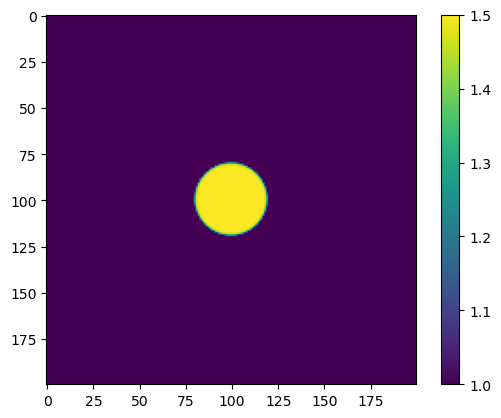

Mode 10 skipped: K outside the range [1.0, 1.5].
Mode 9 skipped: K outside the range [1.0, 1.5].
Mode 8 skipped: K outside the range [1.0, 1.5].
Mode 7 skipped: K outside the range [1.0, 1.5].


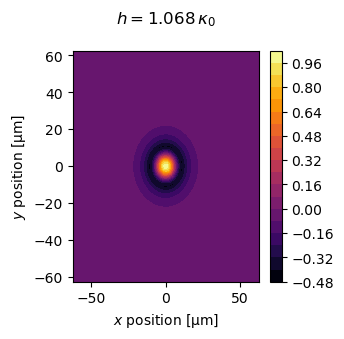

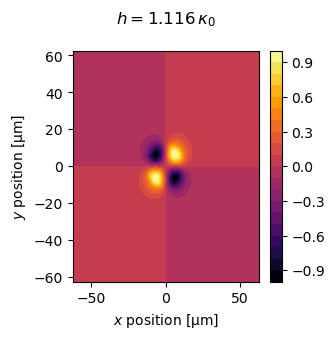

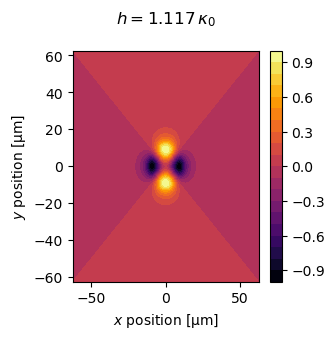

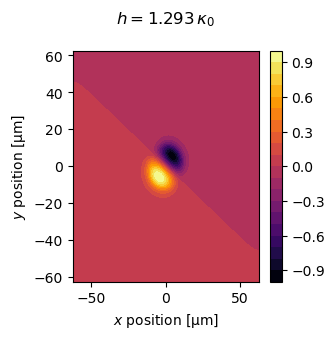

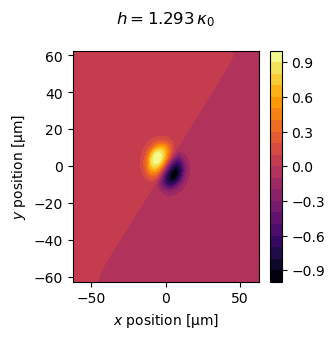

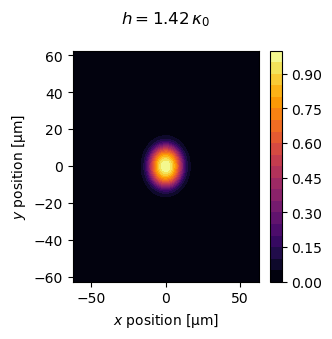

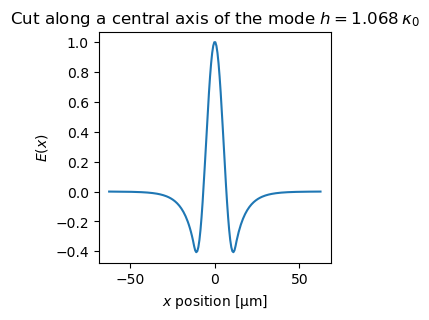

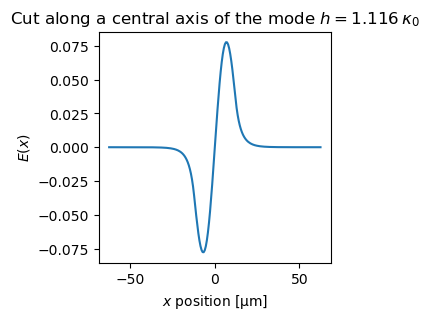

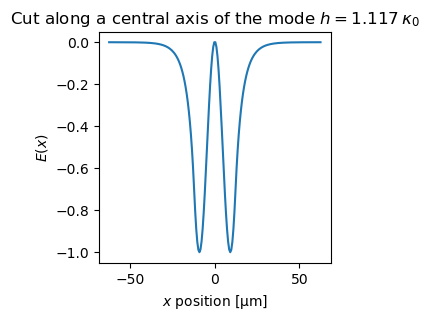

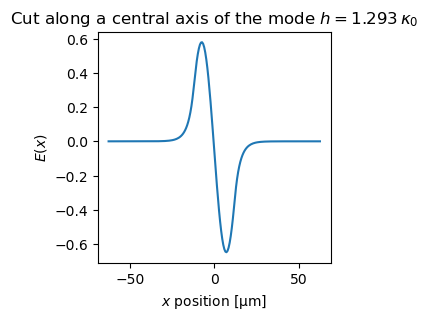

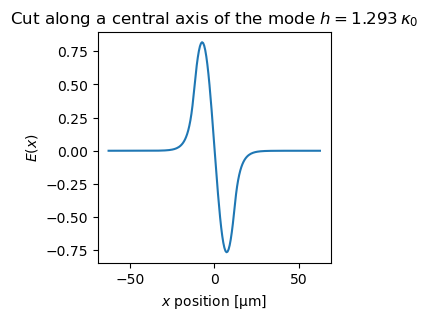

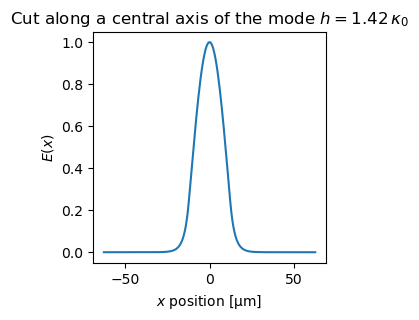

In [6]:
core_fraction = 0.2
def super_gaussian_circle(x, y):
    n_p = 1.5
    n_inf = 1.0
    delta = (n_p**2-n_inf**2)/2/n_p**2
    alpha = 40
    r = np.sqrt(x**2+y**2)
    return n_p*np.sqrt(1-2*delta*(r/core_fraction)**alpha) if r < core_fraction else n_inf

solver = Helmholtz_2D(super_gaussian_circle, 125e-6, N=200, omega=1e14)
solver.plot_refr_index()
valid_modes = solver.plot_guided_modes(10, min_K=1.0, max_K=1.5, tol=0.0001)
for K, v in valid_modes:
    solver.plot_mode_in_1D(K, v)

## "Multi-core" fibers and Misc.

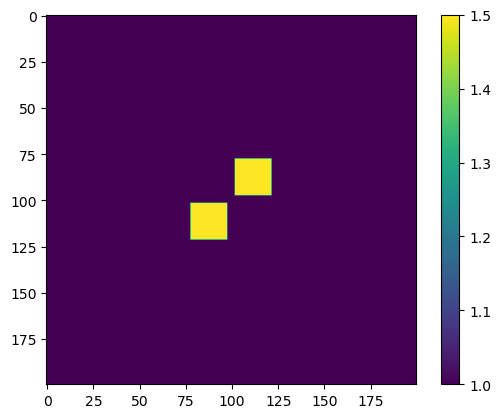

Mode 10 skipped: K outside the range [1.0, 1.5].
Mode 9 skipped: K outside the range [1.0, 1.5].
Mode 8 skipped: K outside the range [1.0, 1.5].
Mode 7 skipped: K outside the range [1.0, 1.5].


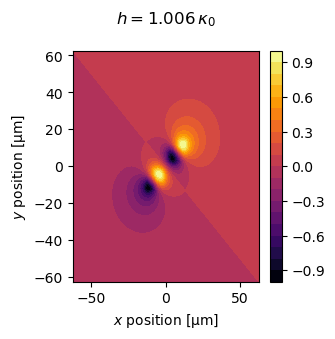

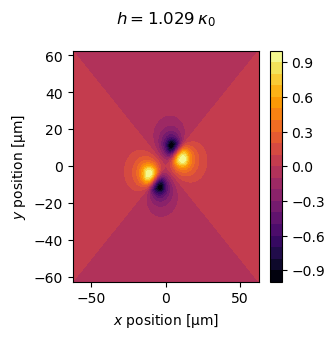

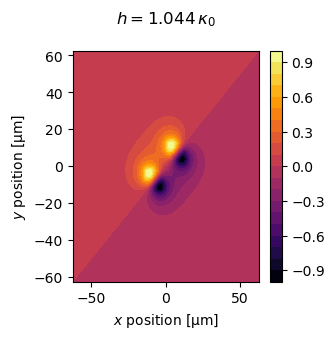

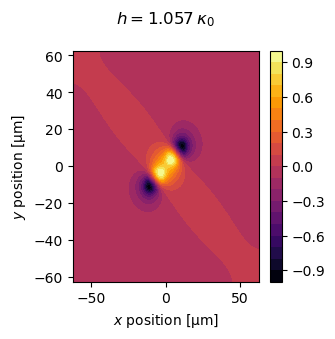

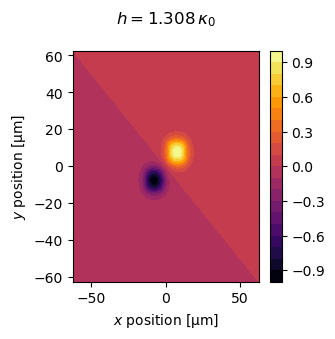

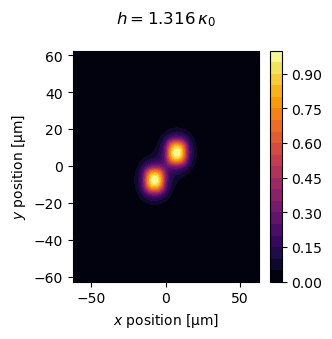

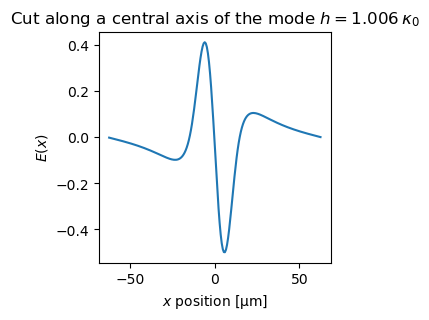

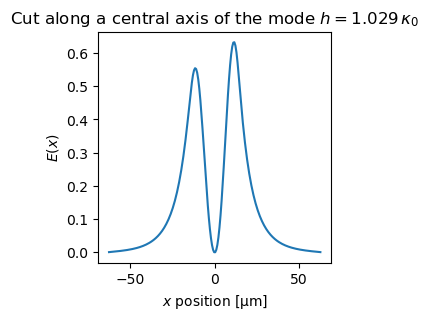

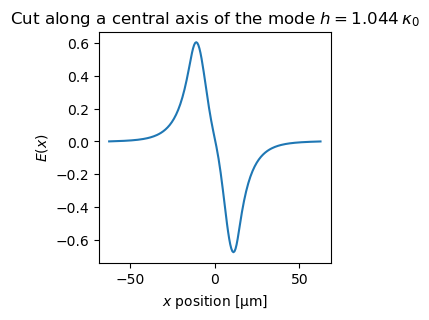

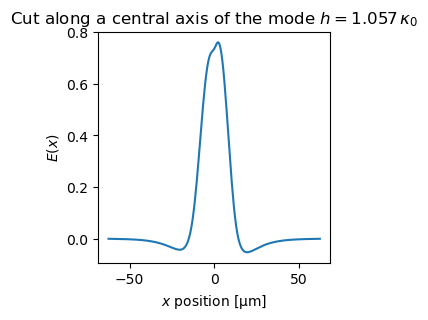

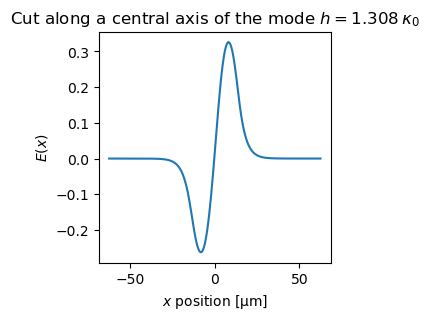

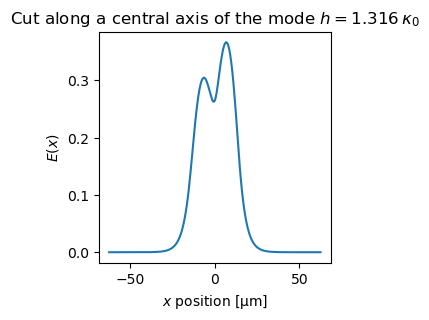

In [7]:
core_fraction = 0.1
c_pos = 0.12
def two_squares(x, y):
    return 1.5 if (max(abs(x-c_pos), abs(y-c_pos)) < core_fraction or \
                   max(abs(x+c_pos), abs(y+c_pos)) < core_fraction) else 1.0

%matplotlib inline
solver = Helmholtz_2D(two_squares, 125e-6, N=200, omega=1e14)
solver.plot_refr_index()
valid_modes = solver.plot_guided_modes(10, min_K=1.0, max_K=1.5, tol=0.0001)
for K, v in valid_modes:
    solver.plot_mode_in_1D(K, v)
    
# for K, v in valid_modes:
#     solver.plot_mode_in_3D(K, v)
# print(solver)  # To see the parameters that were used to find these modes

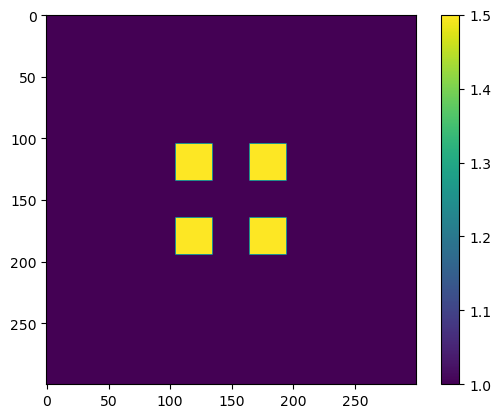

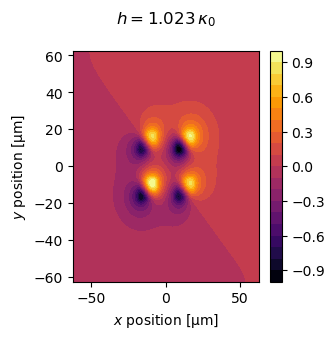

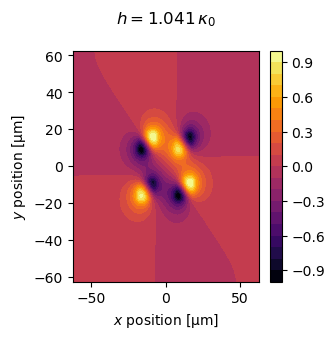

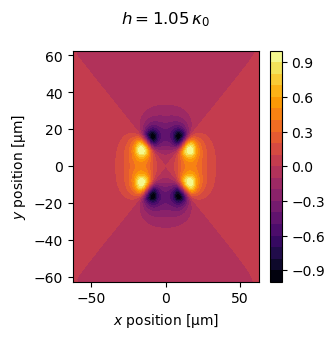

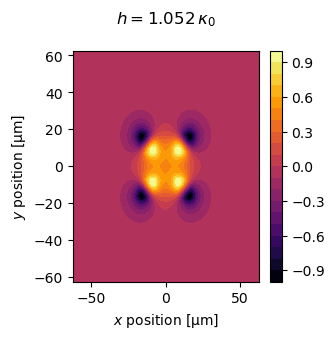

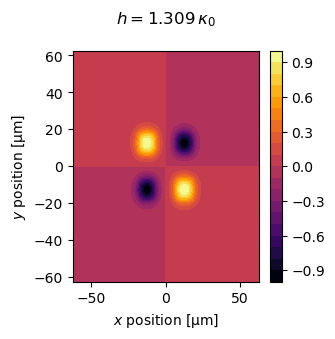

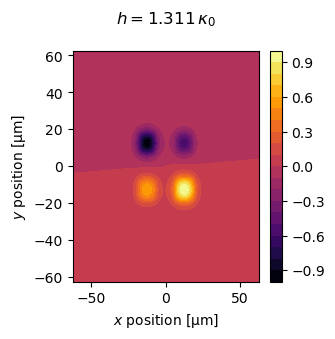

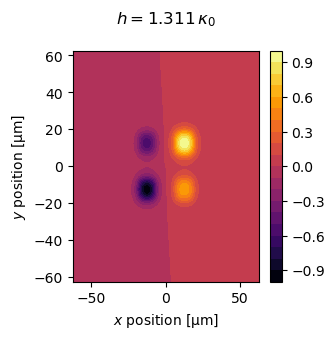

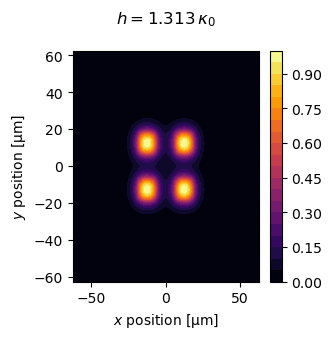

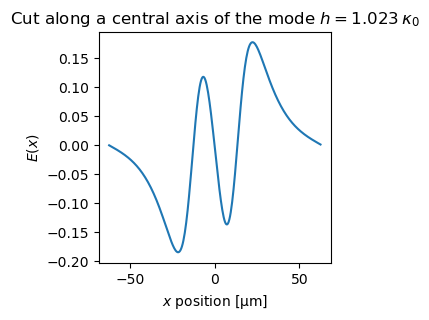

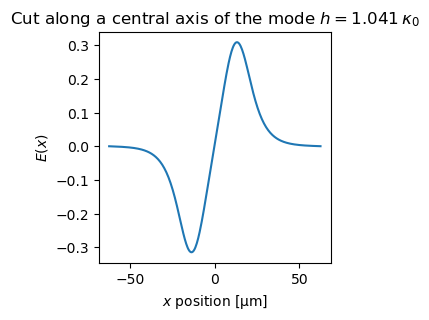

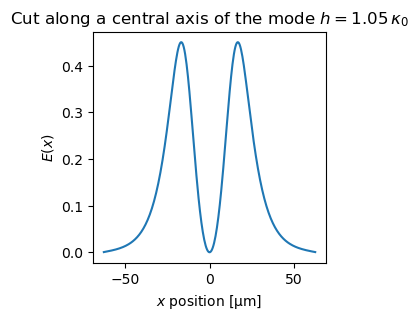

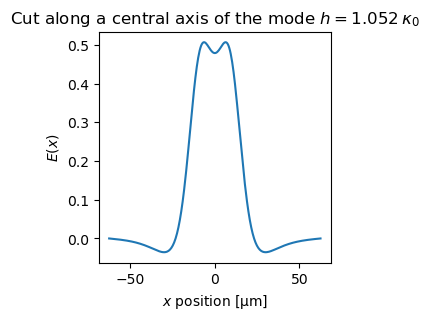

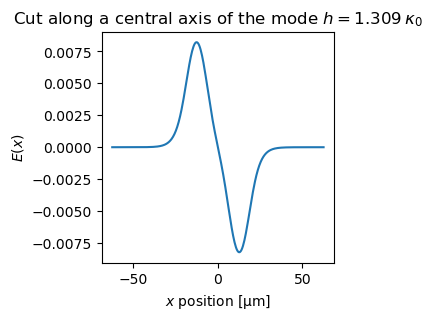

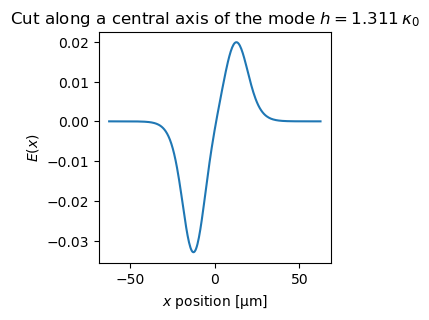

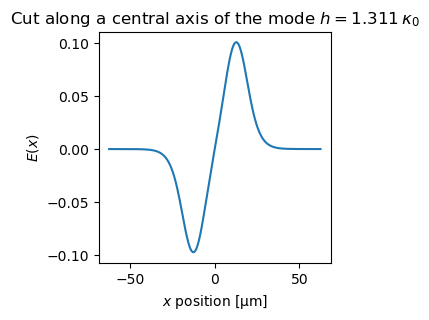

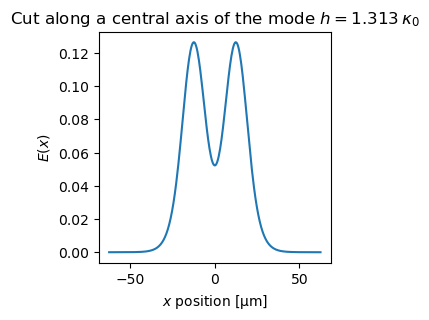

In [8]:
core_fraction = 0.1
c_pos = 0.2
def four_squares(x, y):
    return 1.5 if (max(abs(x-c_pos), abs(y-c_pos)) < core_fraction \
                or (max(abs(x+c_pos), abs(y+c_pos))) < core_fraction \
                or (max(abs(x-c_pos), abs(y+c_pos))) < core_fraction \
                or (max(abs(x+c_pos), abs(y-c_pos))) < core_fraction) else 1.0

%matplotlib inline
solver = Helmholtz_2D(four_squares, 125e-6, N=300, omega=1e14)
solver.plot_refr_index()
valid_modes = solver.plot_guided_modes(8, min_K=1.0, max_K=1.5, tol=0.0001)
for K, v in valid_modes:
    solver.plot_mode_in_1D(K, v)
    
# for K, v in valid_modes:
#     solver.plot_mode_in_3D(K, v)

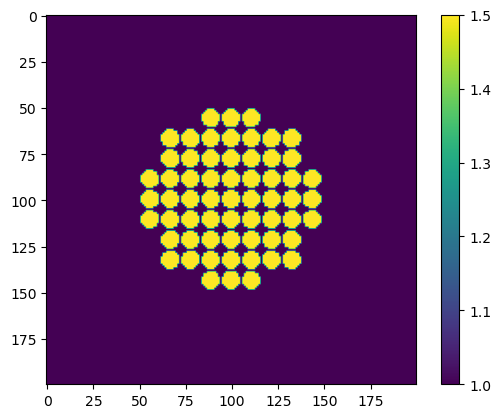

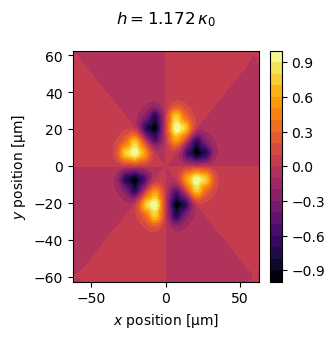

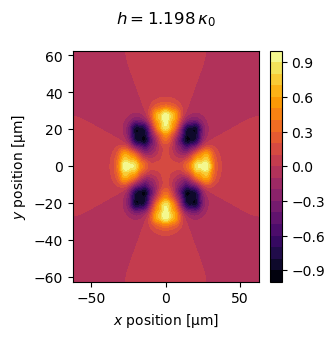

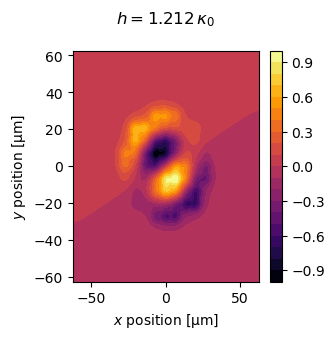

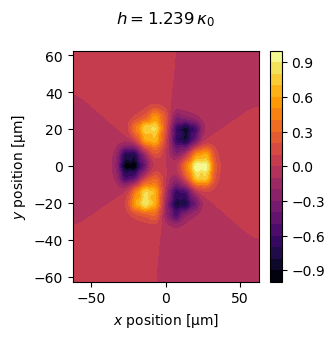

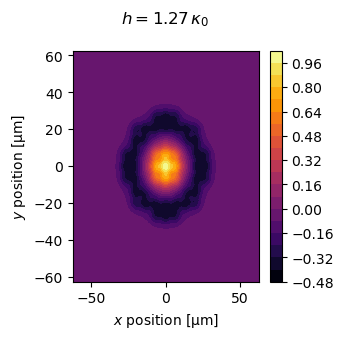

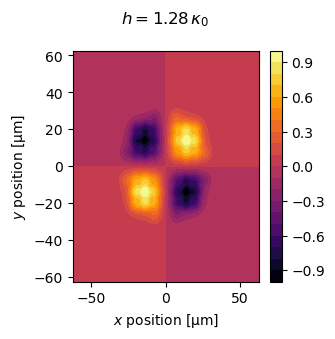

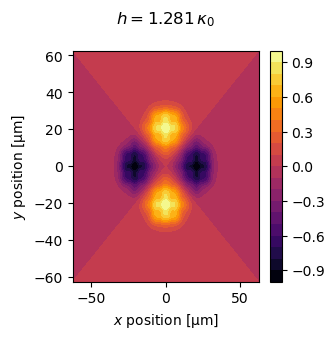

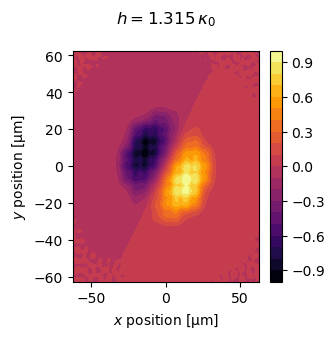

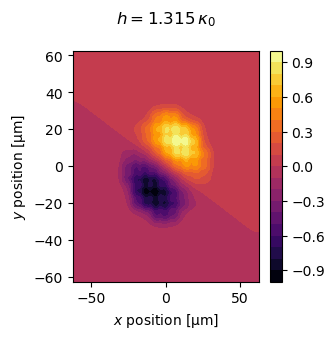

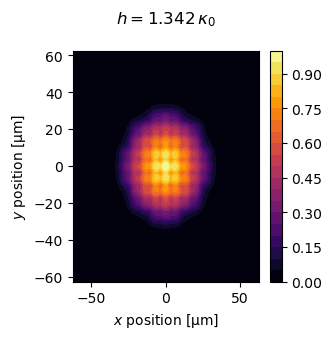

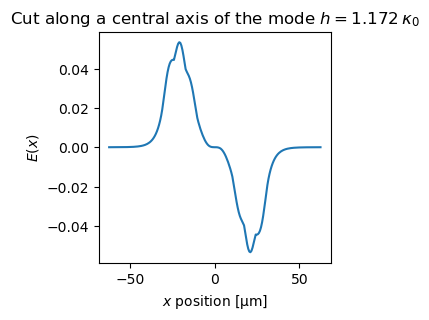

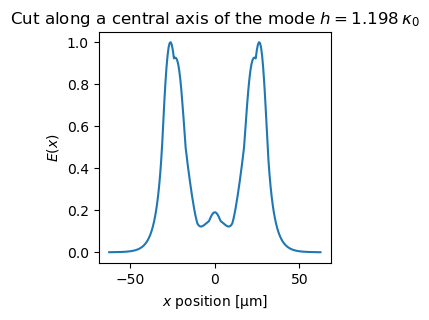

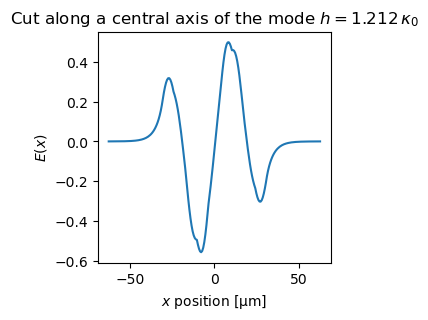

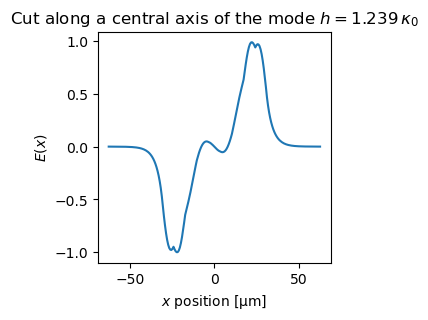

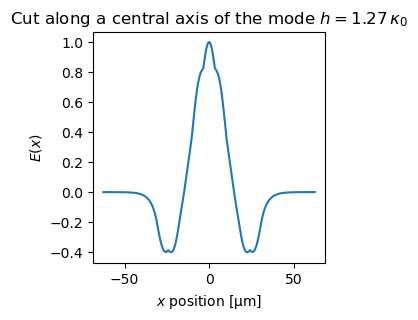

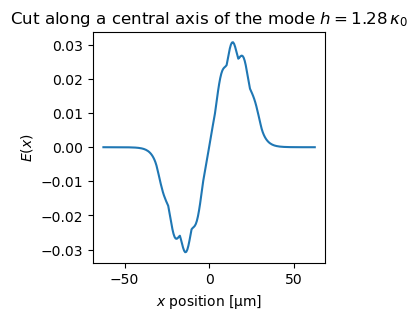

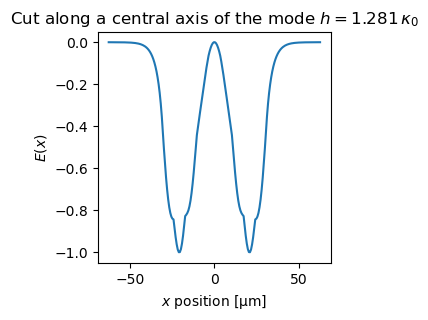

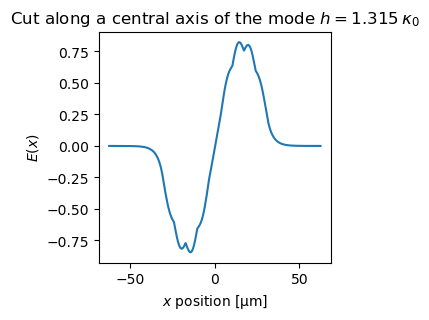

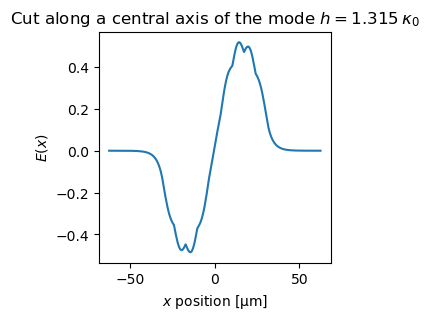

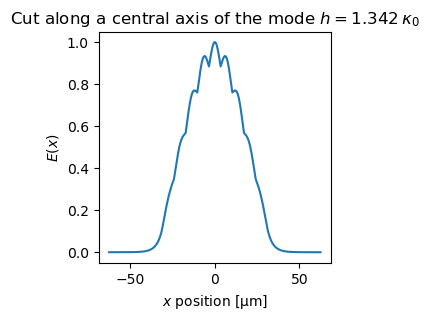

In [9]:
core_fraction = 0.05
core_sep = 0.11
def multiple_cylinder(x, y):
    radius = lambda m, n: np.sqrt((x + m * core_sep) ** 2 + (y + n * core_sep) ** 2)
    if any(radius(m, n) < core_fraction for m in range(-5, 6) for n in range(-5, 6) if m**2 + n**2 <= 19):
        return 1.5
    return 1.0
    
%matplotlib inline
solver = Helmholtz_2D(multiple_cylinder, 125e-6, N=200, omega=1e14)
solver.plot_refr_index()
valid_modes = solver.plot_guided_modes(10, min_K=1.0, max_K=1.5, tol=0.0001)
for K, v in valid_modes:
    solver.plot_mode_in_1D(K, v)

# for K, v in valid_modes:
#     solver.plot_mode_in_3D(K, v)

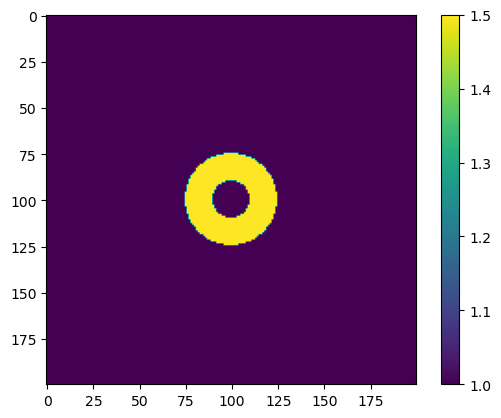

Mode 10 skipped: K outside the range [1.0, 1.5].
Mode 9 skipped: K outside the range [1.0, 1.5].


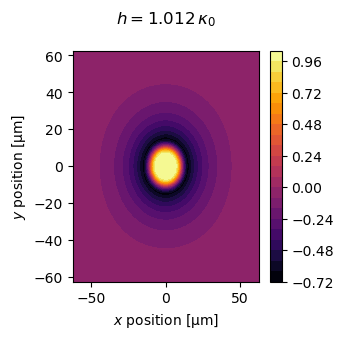

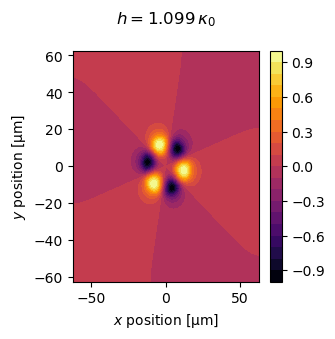

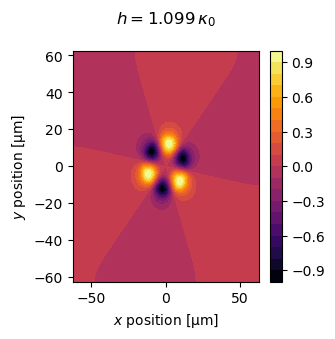

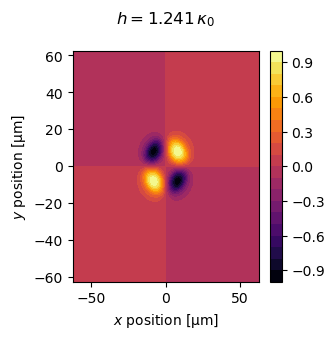

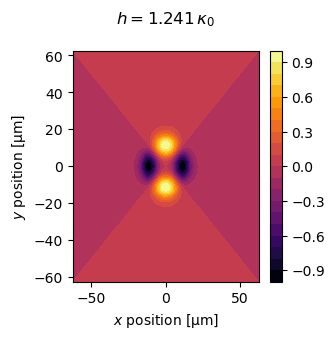

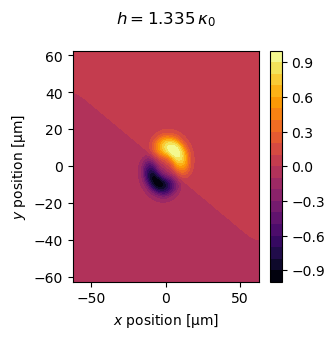

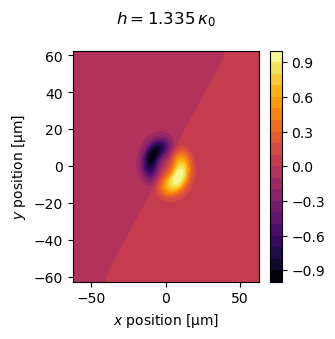

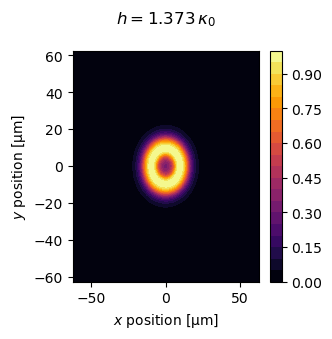

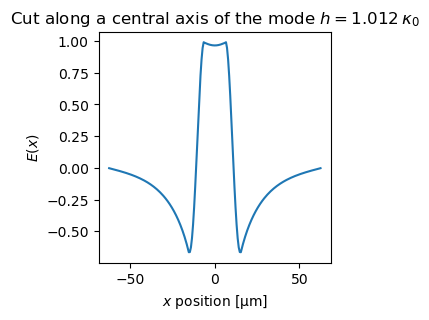

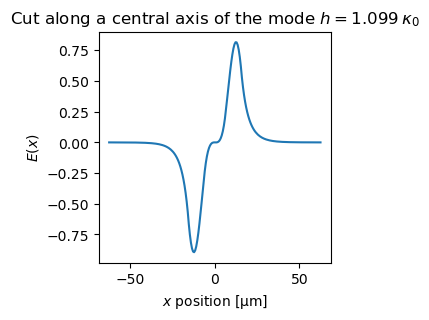

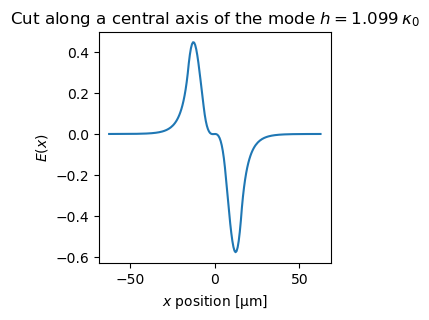

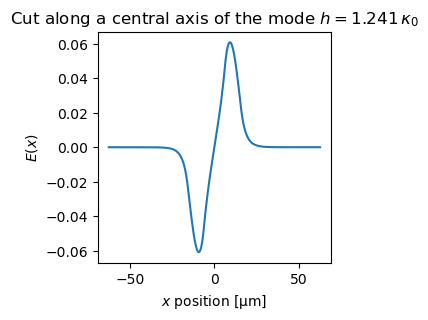

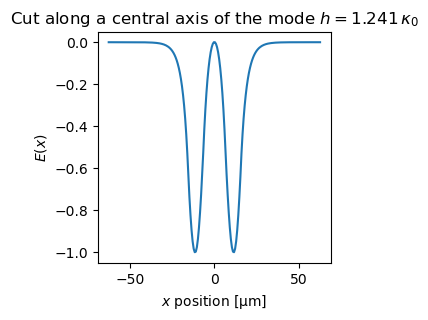

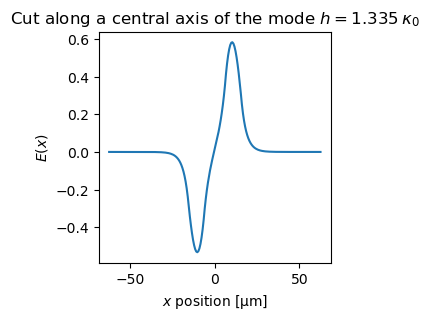

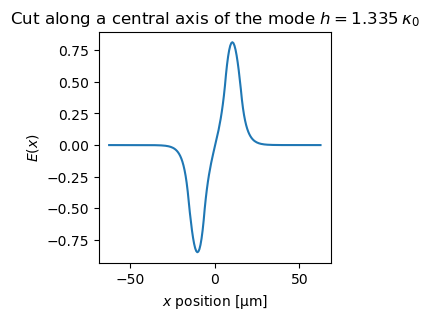

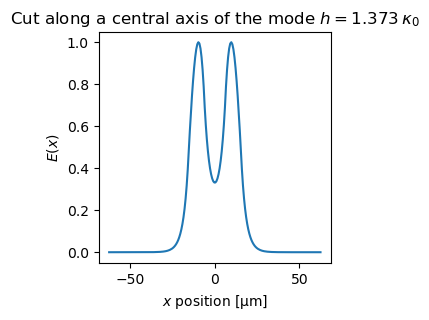

In [10]:
core_fraction1 = 0.1
core_fraction2 = 0.25
def annulus(x, y):
    if core_fraction1 <= np.sqrt(x ** 2 + y ** 2) <= core_fraction2:
        return 1.5
    return 1.0
    
%matplotlib inline
solver = Helmholtz_2D(annulus, 125e-6, N=200, omega=1e14)
solver.plot_refr_index()
valid_modes = solver.plot_guided_modes(10, min_K=1.0, max_K=1.5, tol=0.0001)
for K, v in valid_modes:
    solver.plot_mode_in_1D(K, v)

# for K, v in valid_modes:
#     solver.plot_mode_in_3D(K, v)

## Power transmission in the optical fiber

### Orthogonality of guided modes

We define a functional that computes the inner product between two continuous functions $f_1\colon \mathbb{R}^2\to \mathbb{R}$ and $f_2\colon\mathbb{R}^2\to \mathbb{R}$ on the domain of the waveguide,
$$\mathcal{J}(f_1, f_2)\equiv\,\left\langle f_1,f_2\right\rangle = \int_{-b}^b \int_{-b}^b f_1(x, y)f_2(x, y) \,\mathrm{d}x\,\mathrm{d}y.$$
To see if two modes $f$ and $g$ are orthogonal, we have to check whether the condition $\mathcal{J}(f, g)=0$ is satisfied. The program computes these eigenmodes on a discrete set of equidistant points $\{(x_i,\, y_i)\}_{i=1,\dots,N}$, where $-b = x_1 < x_2 < \dots < x_{N-1} < x_N = b$ and $-b = y_1 < y_2 < \dots < y_{N-1} < y_N = b$. Due to this, we can approximate the inner product $\mathcal{J}(f, g)$ by the discrete sum:
$$\mathcal{J}(f, g)\approx (\Delta x)^2\sum_{i=1}^N \sum_{j=1}^N f(x_i, y_j) g(x_i, y_j),$$
where $\Delta x=x_{k+1}-x_{k}=y_{k+1}-y_k$ for all $k=1,\dots,\, N-1$.

In [11]:
J = lambda f_1, f_2, width: (width / (f_1.size - 1)) **2 * np.sum(f_1 * f_2) 

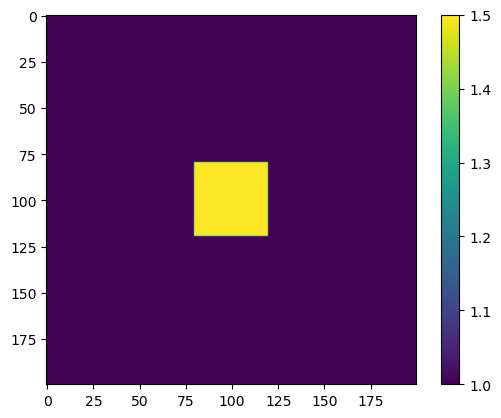

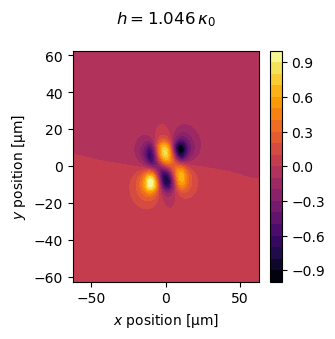

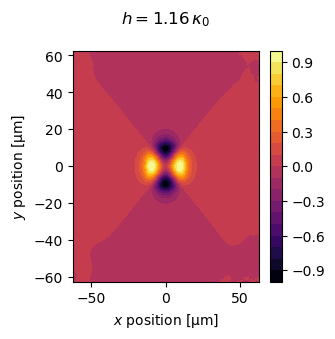

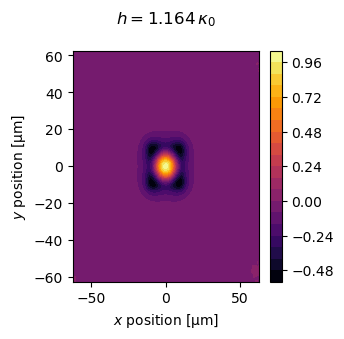

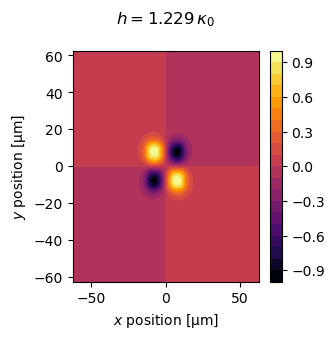

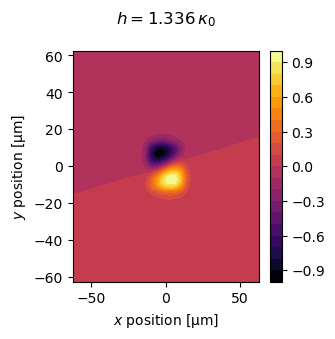

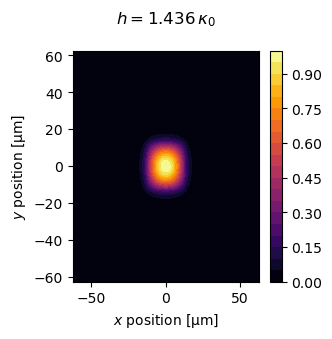

Inner product of modes 0 and 0 with 1.436 and 1.436: 5.870503176783983e-15
Inner product of modes 0 and 1 with 1.436 and 1.336: -1.6862369106259178e-30
Inner product of modes 0 and 2 with 1.436 and 1.229: 1.787570029684638e-30
Inner product of modes 0 and 3 with 1.436 and 1.164: 2.126428680660953e-30
Inner product of modes 0 and 4 with 1.436 and 1.16: 2.665717367373948e-30
Inner product of modes 0 and 5 with 1.436 and 1.046: 4.373486505084976e-31
Inner product of modes 1 and 1 with 1.336 and 1.336: 5.5645008952516966e-15
Inner product of modes 1 and 2 with 1.336 and 1.229: -5.308758104485506e-30
Inner product of modes 1 and 3 with 1.336 and 1.164: -4.13921221278364e-30
Inner product of modes 1 and 4 with 1.336 and 1.16: -8.909064326706542e-30
Inner product of modes 1 and 5 with 1.336 and 1.046: -3.977497662766933e-31
Inner product of modes 2 and 2 with 1.229 and 1.229: 6.282182125842307e-15
Inner product of modes 2 and 3 with 1.229 and 1.164: 2.1838399670291624e-30
Inner product of mod

In [12]:

core_fraction = 0.2
def pcws_constant_square(x, y):
    return 1.5 if max(abs(x), abs(y)) < core_fraction else 1.0

%matplotlib inline
solver = Helmholtz_2D(pcws_constant_square, 125e-6, N=200, omega=1e14)
solver.plot_refr_index()
valid_modes = solver.plot_guided_modes(6, min_K=1.0, max_K=1.5, tol=0.001)[::-1]

for i1, (K1, v1) in enumerate(valid_modes):
    for i2, (K2, v2) in enumerate(valid_modes[i1:]):
        print(f"Inner product of modes {i1} and {i1+i2} with {round(K1, 3)} and {round(K2, 3)}: {J(v1, v2, 125e-6)}")

As we can see from this example, the numerical inner product of two different modes is about fifteen orders of magnitude smaller than the inner product of any of the modes with itself. This confirms that the modes we obtained are indeed orthogonal.

### Decomposition of a gaussian laser beam into guided modes

A standard choice would be to consider a gaussian laser beam of width $w_0$ and power $P$ entering the optical fiber at normal incidence (we can assume that the laser is focused by some optical system in such a way that the beam enters the dielectric material exactly when the width of the beam is exactly the beam waist). The amplitude of the electric field of such a beam is given by
$$\tag{8}E(x,y)=E_0\exp\left(-\frac{x^2+y^2}{w_0^2}\right),\qquad{}\text{where}\qquad{} E_0 = \frac{2\sqrt{\mu_0c P}}{\sqrt{\pi} w_0}.$$

If the optical fiber under consideration has $m$ guided modes $f_1,\,f_2,\dots,\,f_m$ with corresponding eigenvalues $h_1,\,h_2,\dots,\,h_m$, then we can decompose the input signal as
$$\tag{9}E(x, y) = \sum_{i=1}^m c_i f_i(x, y) + \text{continuous components due to radiative modes},$$
where the coefficients $\{c_i\}_{i=1,\dots,m}$ quantify the contribution of each mode to the profile of the input signal. More precisely, taking the inner product of $E(x,y)$ with itself yields
$$\tag{10}\lVert E\rVert ^2=\left\langle E, E\right\rangle=\left\langle \sum_{i=1}^m c_i f_i, \sum_{i=1}^m c_i f_i\right\rangle=\sum_{i=1}^m |c_i|^2\lVert f_i\rVert ^2.$$
Therefore, the contribution of mode $i$ can be assesed by computing the ratio $\dfrac{|c_i|^2 \lVert f_i\rVert ^2}{\lVert E\rVert ^2}$.

----

The radiative modes decay very quickly, since they lose significant power in the cladding. We therefore focus on **projecting** the incoming signal onto the guided modes of the fiber. In particular, if we project (8) onto mode $j$, by the orthogonality of the guided modes demonstrated in the previous section, we can write approximately:
$$\tag{11}\int_{-b}^b \int_{-b}^b E(x,y)f_j(x,y) \,\mathrm{d}x \,\mathrm{d}y \approx \int_{-b}^b  \int_{-b}^b  \sum_{i=1}^m c_i f_i(x,y)f_j(x,y)\,\mathrm{d}x\,\mathrm{d}y= \lVert f_j\rVert ^2c_j.$$
Therefore,
$$\tag{12}c_i \approx \dfrac{\int_{-b}^b \int_{-b}^b  E(x)f_i(x) \,\mathrm{d}x \,\mathrm{d}y}{\int_{-b}^b \int_{-b}^b f_i^2(x) \,\mathrm{d}x \,\mathrm{d}y}=\dfrac{\left\langle E, f_i\right\rangle}{\left\langle f_i,f_i\right\rangle}.$$

### Optimal width of the gaussian beam

We now turn to the particular example of a waveguide with a step-potential that is narrow enough to allow only a single guided mode. This can be used to model, in a first approximation, a single-mode optical fiber. 

We know from the previous parts that the fundamental mode of such a waveguide looks approximately like a half-period of the cosine function, patched with exponentially-decaying tails in the cladding. Intuitively, we expect that if we choose the width $w$ of the gaussian in such a way that it matches the width of the fundamental mode, the coefficient of this mode should be quite high. 

In [13]:
def E_gaussian(w):
    return lambda x, y: np.exp(-(x ** 2 + y ** 2) / w ** 2)

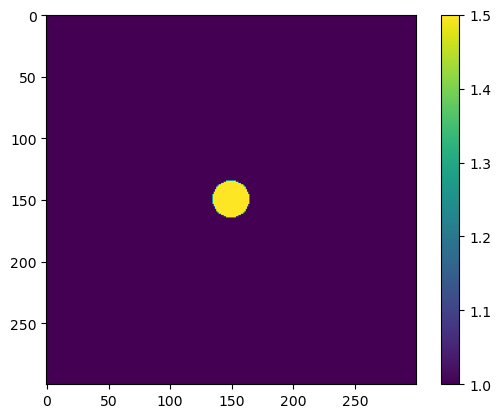

Mode 2 skipped: K outside the range [1.0, 1.5].


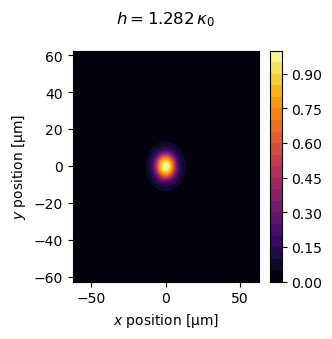

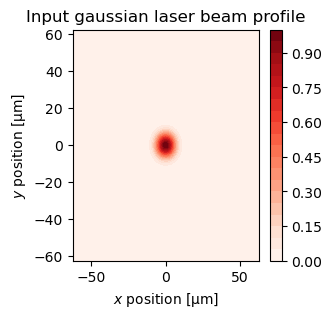

0.8749016643519169 0.9854558524028243


In [14]:
core_fraction = 0.1
no_points = 300
def circle(x, y):
    return 1.5 if np.sqrt(x**2 + y**2) < core_fraction else 1.0

solver = Helmholtz_2D(circle, 125e-6, N=no_points, omega=1e14)
solver.plot_refr_index()
valid_modes = solver.plot_guided_modes(2, min_K=1.0, max_K=1.5, tol=0.001)

def compute_contribution(fiber, core_frac, modes, signal, mode_number, rel_width, plot=True):
    x_arr = np.linspace(-fiber.L, fiber.L, no_points)
    signal_arr = np.array([np.array([signal(core_frac * fiber.L * rel_width)(x, y) for x in x_arr]) for y in x_arr])
    if plot:
        plt.figure(figsize=(3.0, 3.0))
        cont = plt.contourf(fiber.x * fiber.L * 0.5, fiber.y * fiber.L * 0.5, signal_arr, 20, cmap='Reds')
        plt.colorbar(cont)
        plt.title(f'Input gaussian laser beam profile')
        plt.xlabel(r'$x$ position [µm]')
        plt.ylabel(r'$y$ position [µm]')
        plt.show()
    coeff = J(signal_arr, modes[mode_number-1], fiber.L) / \
                J(modes[mode_number-1], modes[mode_number-1], fiber.L)
    E_norm2 = J(signal_arr, signal_arr, fiber.L)
    contrib = coeff ** 2 * J(modes[mode_number-1], modes[mode_number-1], fiber.L) / E_norm2
    return coeff, contrib

c_1, contrib_1 = compute_contribution(solver, core_fraction, [p[1] for p in valid_modes], \
                                        E_gaussian, 1, 1, plot=True)
print(c_1, contrib_1)

We see that for this particular choice of the beam width, we obtain a contribution of about 98.5% of the fundamental mode. Let us sample over a wider range of input beam widths, to determine which one is closest to the fundamental of the waveguide.

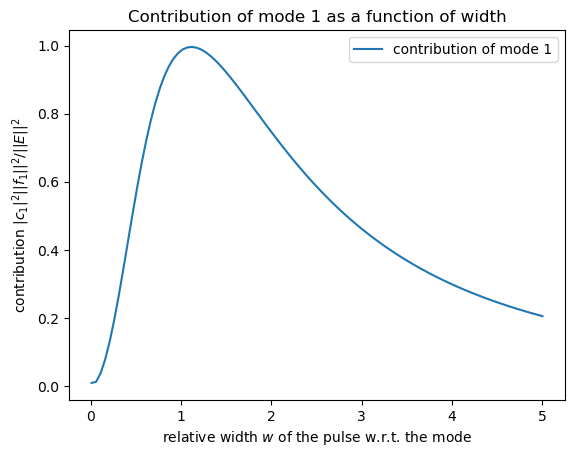

The maximum contribution is reached for w = 1.119: 99.6%


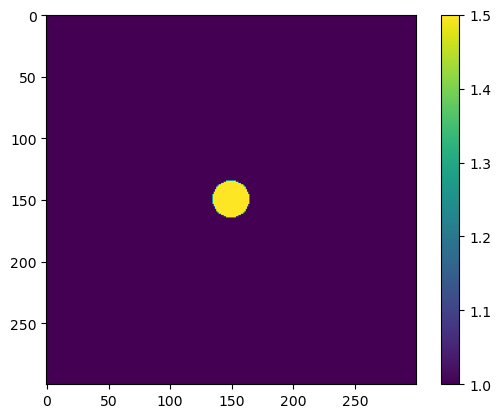

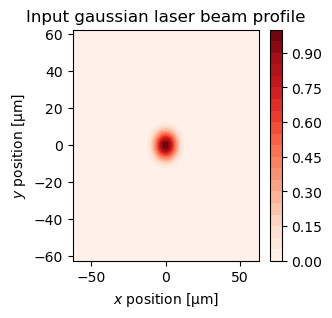

(0.9842284053466664, 0.9961771024668016)

In [15]:
def width_sample(fiber, core_frac, modes, w_min, w_max, N=100, signal=E_gaussian, mode_number=1):
    width_arr = np.linspace(w_min, w_max, N)
    coefs = []
    for w in width_arr:
        coefs.append(np.array(compute_contribution(fiber, core_frac, modes, signal, mode_number, w, plot=False)))
    plt.plot(width_arr, np.array(coefs)[:,1], label=f'contribution of mode {mode_number}')
    plt.title(f"Contribution of mode {mode_number} as a function of width")
    plt.xlabel("relative width $w$ of the pulse w.r.t. the mode")
    plt.ylabel(f"contribution $|c_{mode_number}|^2 ||f_{mode_number}||^2 / ||E||^2$")
    plt.legend()
    plt.show()
    idx, max_contrib = max(list(enumerate(coefs)), key=lambda tup: tup[1][1])
    return width_arr[idx], max_contrib[1]

w_max, contrib_max = width_sample(solver, core_fraction, [p[1] for p in valid_modes], 0.01, 5)
print(f"The maximum contribution is reached for w = {round(w_max, 3)}: {round(contrib_max*100, 1)}%")
solver.plot_refr_index()
compute_contribution(solver, core_fraction, [p[1] for p in valid_modes], E_gaussian, 1, w_max, plot=True)

## Appendix

**Definition: [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product).** If $A$ is an $m\times n$ matrix and $B$ is a $p\times q$ matrix, then the Kronecker product $A\otimes B$ is the $pm\times qn$ block matrix:
$$\mathbf{A} \otimes \mathbf{B}=\left[\begin{array}{ccc}a_{11} \mathbf{B} & \cdots & a_{1 n} \mathbf{B} \\ \vdots & \ddots & \vdots \\ a_{m 1} \mathbf{B} & \cdots & a_{m n} \mathbf{B}\end{array}\right].$$

**Definition: [Kronecker sum](https://mathworld.wolfram.com/KroneckerSum.html).** If $A$ is an $a\times a$ matrix and $B$ is a $b\times b$ matrix, then the Kronecker sum $A\oplus B$ is matrix:
$$\mathbf{A} \oplus \mathbf{B}=\mathbf{A} \otimes \mathbf{I}_b+\mathbf{I}_a\otimes \mathbf{B}.$$
